# MSA 2023 Phase 2 - Part 1

In [139]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### This is the classification data: credit_risk


## 1. Find all variables and understand them

#### 1.1Load data and show first 10 instances

In [140]:
#read file
datasource = pd.read_csv('./data/credit_risk.csv')
datasource.head(10)

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   
5     no checking      36.0                   existing paid   
6     no checking      24.0                   existing paid   
7        0<=X<200      36.0                   existing paid   
8     no checking      12.0                   existing paid   
9        0<=X<200      30.0  critical/other existing credit   

               purpose  credit_amount    savings_status  employment  \
0             radio/tv         1169.0  no known savings         >=7   
1             radio/tv         5951.0              <100      1<=X<4   
2            education         2096.0              <100      4<=X<7   
3  furniture/equipment         7882.0              <100      4<=X<7   
4              new car         4870.0              <100      1<=X<4   
5            education         9055.0  no known savings      1<=X<4   
6  furniture/equipment         2835.0       500<=X<1000         >=7   
7             used car         6948.0              <100      1<=X<4   
8             radio/tv         3059.0            >=1000      4<=X<7   
9              new car         5234.0              <100  unemployed   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   
5                     2.0         male single          none  ...   
6                     3.0         male single          none  ...   
7                     2.0         male single          none  ...   
8                     2.0        male div/sep          none  ...   
9                     4.0        male mar/wid          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   
5   no known property  35.0                 none  for free              1.0   
6      life insurance  53.0                 none       own              1.0   
7                 car  35.0                 none      rent              1.0   
8         real estate  61.0                 none       own              1.0   
9                 car  28.0                 none       own              2.0   

                         job num_dependents  own_telephone foreign_worker  \
0                    skilled            1.0            yes            yes   
1                    skilled            1.0           none            yes   
2         unskilled resident            2.0           none            yes   
3                    skilled            2.0           none            yes   
4                    skilled            2.0           none            yes   
5         unskilled resident            2.0            yes            yes   
6                    skilled            1.0           none            yes   
7  high qualif/self emp/mgmt            1.0            yes            yes   
8         unskilled resident            1.0           none            yes   
9  high qualif/self emp/mgmt            1.0           none            yes   

  class  
0  good  
1   bad  
2  good  
3  good  
4   bad  

### 1.2 knowing the data type and get the mean, std

#### 1.2.1 Data type

In [141]:
#datatypes of each col adn identify the numeric and non-numeric attributes
datatypes = datasource.dtypes 
print('Datatype', datatypes)

Datatype checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object


#### 1.2.2 preview data structure

In [142]:
#preview of the data
columns = len(datasource.columns)
number = sum(datasource.count())
instances_of_each_column = datasource.count()
print('number of columns: ', columns)
print('total number of instances: ', number)
print('instances in each column: ', instances_of_each_column)

number of columns:  21
total number of instances:  21000
instances in each column:  checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64


#### 1.2.3 Get mean and std for numerical variables

In [143]:
#get mean and std for numerical variable
col_numeric_list = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

df_duration_mean = datasource['duration'].agg(['mean', 'std'])
df_credit_amount_mean = datasource['credit_amount'].agg(['mean', 'std'])
df_installment_commitment_mean = datasource['installment_commitment'].agg(['mean', 'std'])
df_residence_since_mean = datasource['duration'].agg(['mean', 'std'])
df_age_amount_mean = datasource['credit_amount'].agg(['mean', 'std'])
df_existing_credits_mean = datasource['installment_commitment'].agg(['mean', 'std'])
df_num_dependents_mean = datasource['num_dependents'].agg(['mean', 'std'])

print('duration:', df_duration_mean, 'credit_amount', df_credit_amount_mean, 'installment_commitment', df_installment_commitment_mean, 'residence_since', df_residence_since_mean,'age', df_age_amount_mean, 'existing_credits', df_existing_credits_mean, 'num_dependents', df_num_dependents_mean)
datasource.describe()

duration: mean    20.903000
std     12.058814
Name: duration, dtype: float64 credit_amount mean    3271.258000
std     2822.736876
Name: credit_amount, dtype: float64 installment_commitment mean    2.973000
std     1.118715
Name: installment_commitment, dtype: float64 residence_since mean    20.903000
std     12.058814
Name: duration, dtype: float64 age mean    3271.258000
std     2822.736876
Name: credit_amount, dtype: float64 existing_credits mean    2.973000
std     1.118715
Name: installment_commitment, dtype: float64 num_dependents mean    1.155000
std     0.362086
Name: num_dependents, dtype: float64


duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

Higher standard deviation represents higher variance, from the initualized view of numeric attributes, we could see that Credit_Amount has larger variance compared to other two numeric variables. And the range of Credit_amount is extremly larger than other numeric variables.

#### 1.2.4 Number of null values and completeness of data

In [144]:
#null values
number_of_null = datasource.isna().sum()
print(number_of_null)
print()
percentage_of_complete = (1 - number_of_null / len(datasource))* 100
print(percentage_of_complete)



checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

checking_status           100.0
duration                  100.0
credit_history            100.0
purpose                   100.0
credit_amount             100.0
savings_status            100.0
employment                100.0
installment_commitment    100.0
personal_status           100.0
other_parties             100.0
residence_since           100.0
property_magnitude        100.0
age           

In [145]:
print(datasource.nunique())

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64


#### 1.3 graphically plot numerical columns

#### 1.3.1 Numeric attributes overall distribution

Class Counts:
duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: count, dtype: int64

Class Proportions:
duration
24.0    0.184
12.0    0.179
18.0    0.113
36.0    0.083
6.0     0.075
15.0    0.064
9.0     0.049
48.0    0.048
30.0    0.040
21.0    0.030
10.0    0.028
60.0    0.013
27.0    0.013
42.0    0.011
11.0    0.009
20.0    0.008
8.0     0.007
4.0     0.006
45.0    0.005
7.0     0.005
39.0    0.005
14.0    0.004
13.0    0.004
33.0    0.003
28.0    0.003
54.0    0.002
16.0    0.002
22.0    0.002
47.0    0.001
5.0     0.001
26.0    0.001
72.0    0.001
40.0    0.001
Name: count, dtype: float64


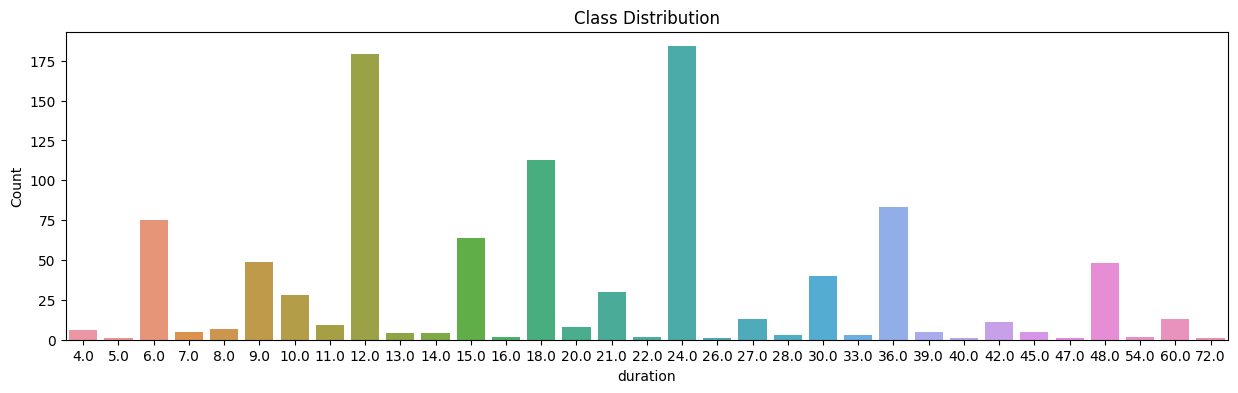

Class Counts:
credit_amount
1478.0    3
1262.0    3
1258.0    3
1275.0    3
1393.0    3
         ..
1459.0    1
882.0     1
3758.0    1
1136.0    1
4576.0    1
Name: count, Length: 921, dtype: int64

Class Proportions:
credit_amount
1478.0    0.003
1262.0    0.003
1258.0    0.003
1275.0    0.003
1393.0    0.003
          ...  
1459.0    0.001
882.0     0.001
3758.0    0.001
1136.0    0.001
4576.0    0.001
Name: count, Length: 921, dtype: float64


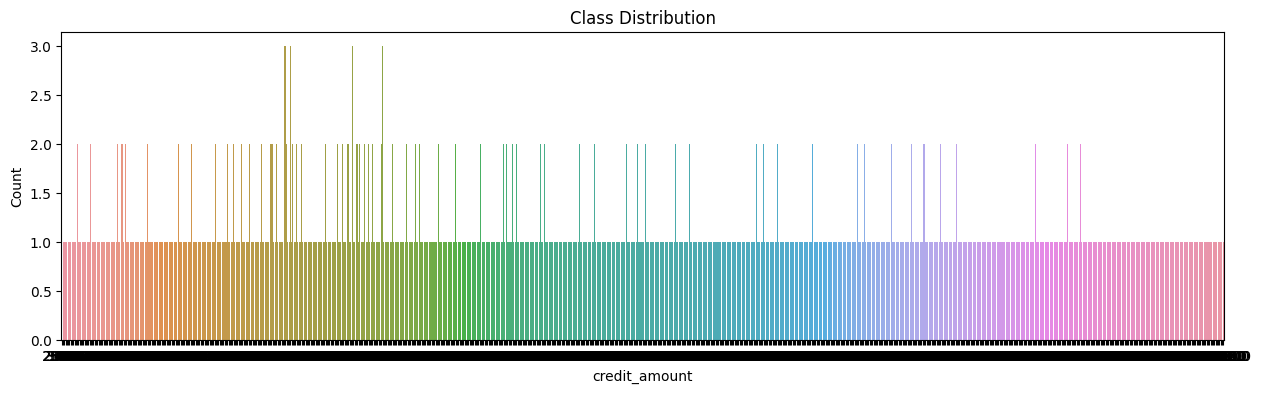

Class Counts:
installment_commitment
4.0    476
2.0    231
3.0    157
1.0    136
Name: count, dtype: int64

Class Proportions:
installment_commitment
4.0    0.476
2.0    0.231
3.0    0.157
1.0    0.136
Name: count, dtype: float64


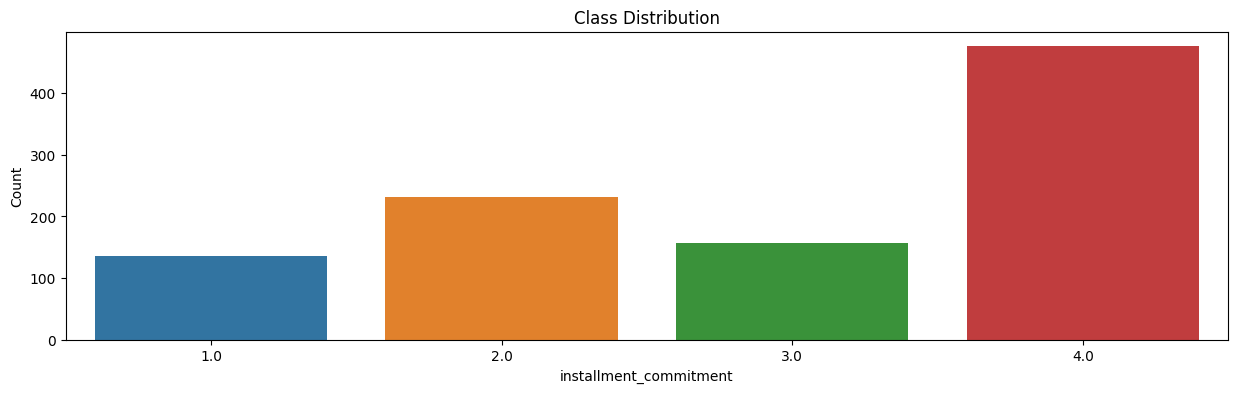

Class Counts:
residence_since
4.0    413
2.0    308
3.0    149
1.0    130
Name: count, dtype: int64

Class Proportions:
residence_since
4.0    0.413
2.0    0.308
3.0    0.149
1.0    0.130
Name: count, dtype: float64


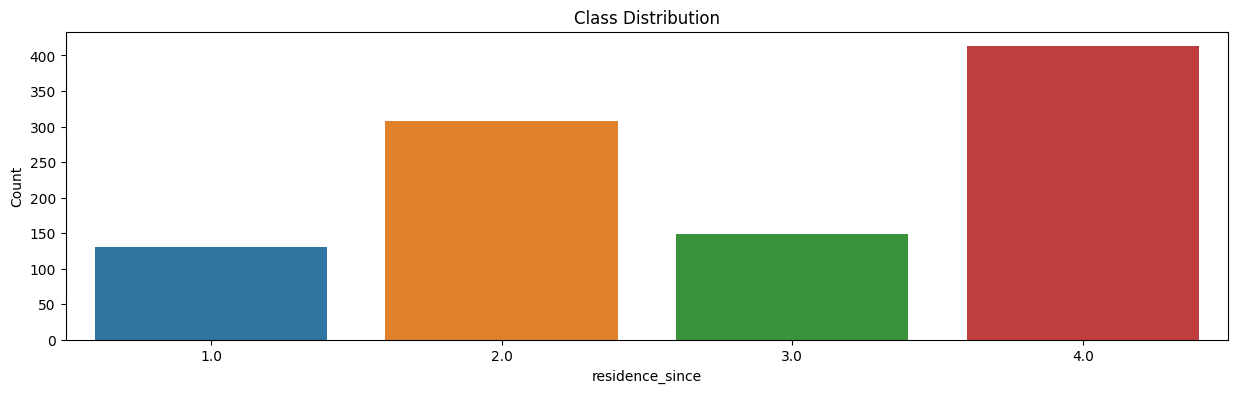

Class Counts:
age
27.0    51
26.0    50
23.0    48
24.0    44
28.0    43
25.0    41
30.0    40
35.0    40
36.0    39
31.0    38
29.0    37
32.0    34
33.0    33
34.0    32
37.0    29
22.0    27
40.0    25
38.0    24
42.0    22
39.0    21
46.0    18
43.0    17
47.0    17
44.0    17
41.0    17
45.0    15
20.0    14
21.0    14
49.0    14
50.0    12
48.0    12
54.0    10
57.0     9
52.0     9
51.0     8
55.0     8
63.0     8
61.0     7
53.0     7
60.0     6
65.0     5
58.0     5
64.0     5
66.0     5
74.0     4
67.0     3
68.0     3
56.0     3
59.0     3
75.0     2
19.0     2
62.0     2
70.0     1
Name: count, dtype: int64

Class Proportions:
age
27.0    0.051
26.0    0.050
23.0    0.048
24.0    0.044
28.0    0.043
25.0    0.041
30.0    0.040
35.0    0.040
36.0    0.039
31.0    0.038
29.0    0.037
32.0    0.034
33.0    0.033
34.0    0.032
37.0    0.029
22.0    0.027
40.0    0.025
38.0    0.024
42.0    0.022
39.0    0.021
46.0    0.018
43.0    0.017
47.0    0.017
44.0    0.017
41.0    0.017

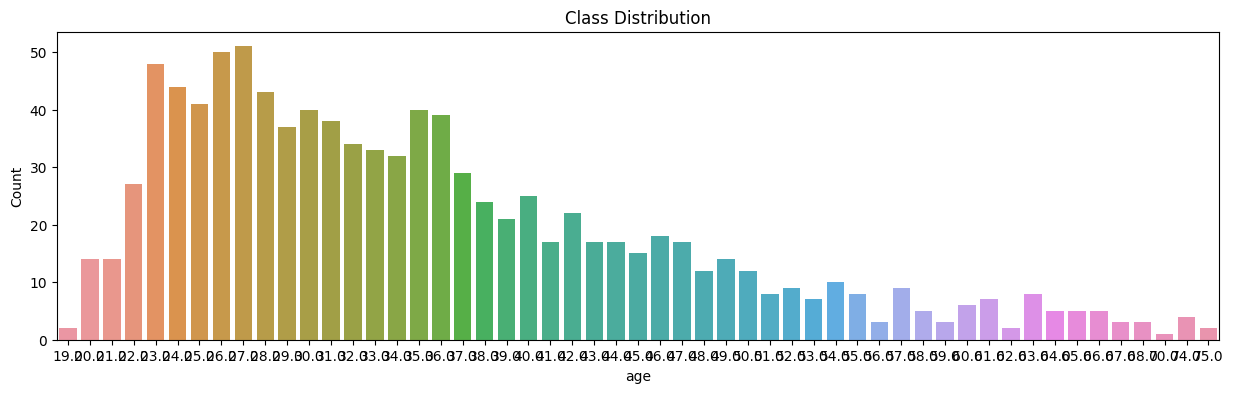

Class Counts:
existing_credits
1.0    633
2.0    333
3.0     28
4.0      6
Name: count, dtype: int64

Class Proportions:
existing_credits
1.0    0.633
2.0    0.333
3.0    0.028
4.0    0.006
Name: count, dtype: float64


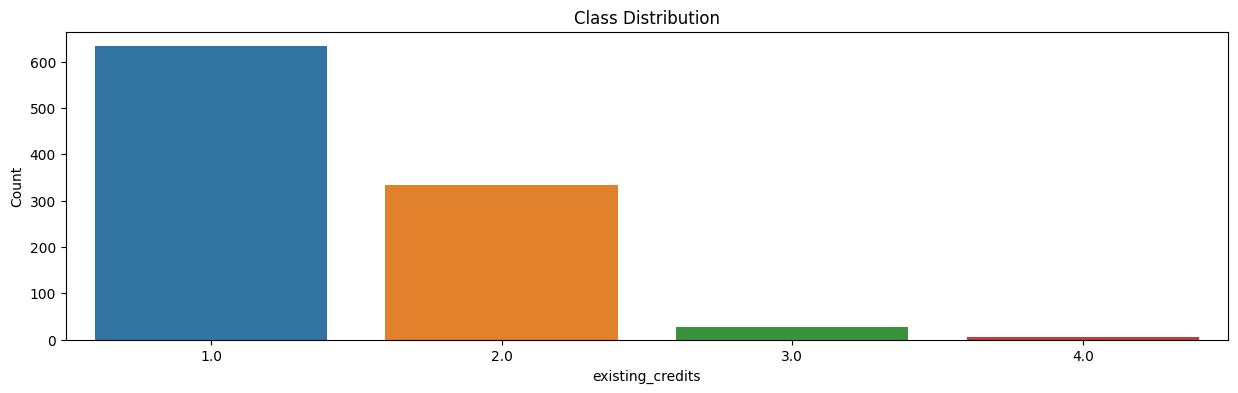

Class Counts:
num_dependents
1.0    845
2.0    155
Name: count, dtype: int64

Class Proportions:
num_dependents
1.0    0.845
2.0    0.155
Name: count, dtype: float64


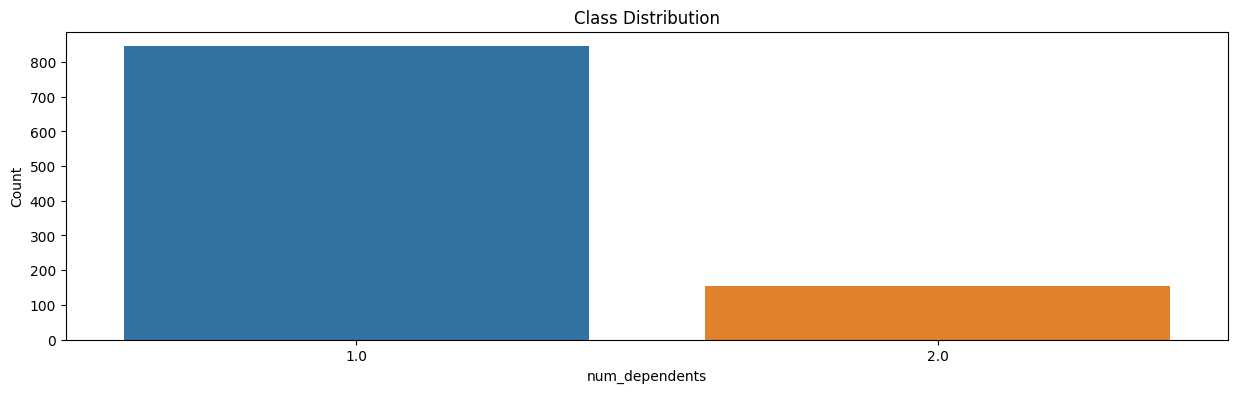

In [146]:
#plot numerical columns bar
columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

for col_namne in columns_list:
    class_counts = datasource[col_namne].value_counts()

# calculate the proportion
    class_proportions = class_counts / class_counts.sum()

# print distribution
    print("Class Counts:")
    print(class_counts)
    print("\nClass Proportions:")
    print(class_proportions)

# draw the distribution
    plt.figure(figsize=(15, 4))
    sns.countplot(data=datasource, x=col_namne)
    plt.title("Class Distribution")
    plt.xlabel(f"{col_namne}")
    plt.ylabel("Count")
    plt.show()

Minimum:4.00
Mean:20.90
Median:18.00
Mode:24.00
Maximum:72.00

Minimum:250.00
Mean:3271.26
Median:2319.50
Mode:1258.00
Maximum:18424.00

Minimum:1.00
Mean:2.97
Median:3.00
Mode:4.00
Maximum:4.00

Minimum:1.00
Mean:2.85
Median:3.00
Mode:4.00
Maximum:4.00

Minimum:19.00
Mean:35.55
Median:33.00
Mode:27.00
Maximum:75.00

Minimum:1.00
Mean:1.41
Median:1.00
Mode:1.00
Maximum:4.00

Minimum:1.00
Mean:1.16
Median:1.00
Mode:1.00
Maximum:2.00



C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\1094265368.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\1094265368.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\1094265368.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\1094265368.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\1094265368.py:40: UserWarning: Matplotlib is currently using m

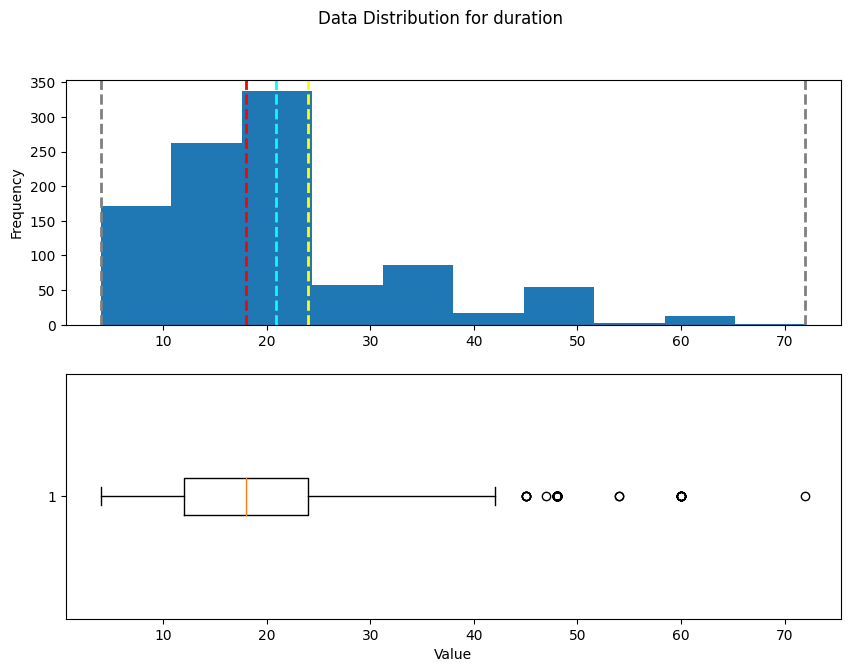

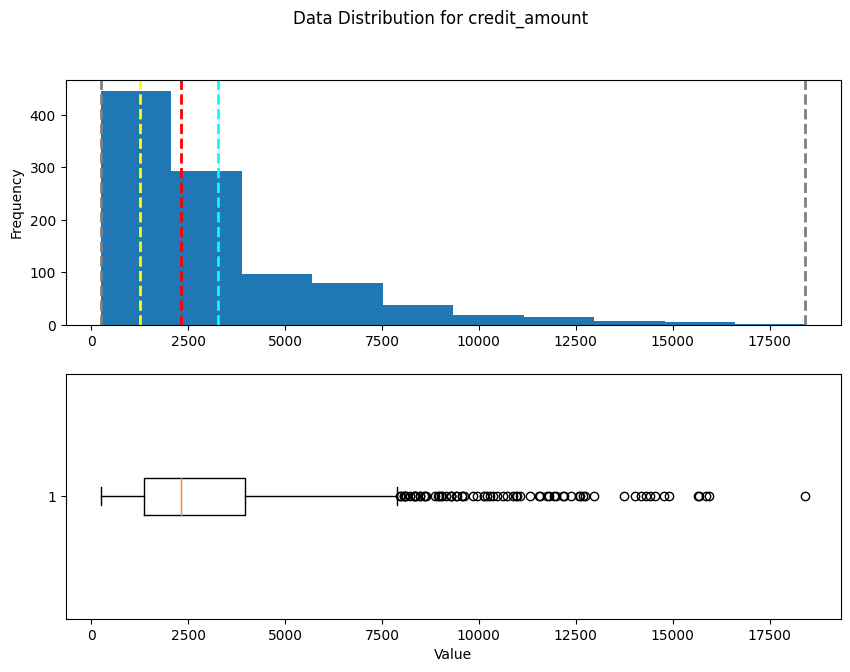

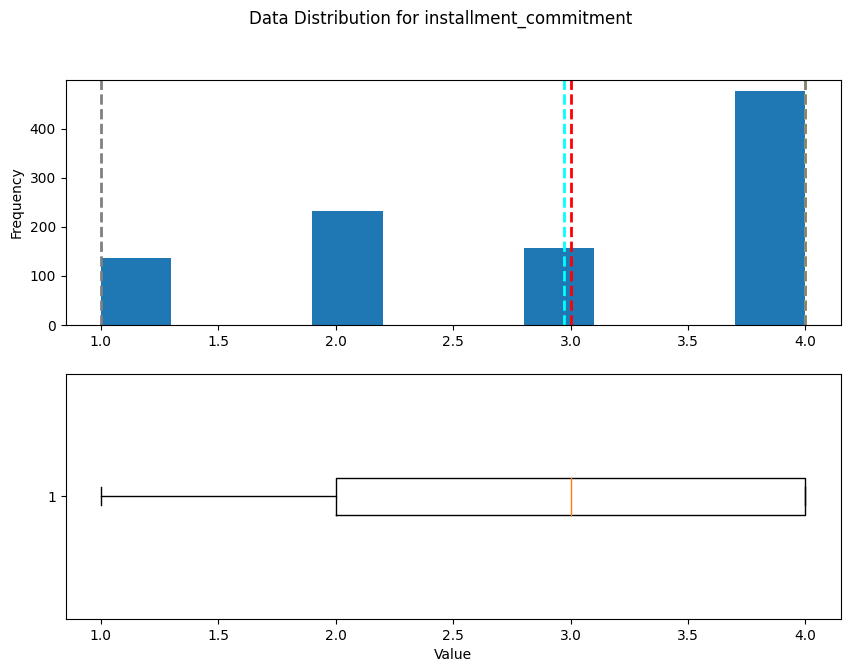

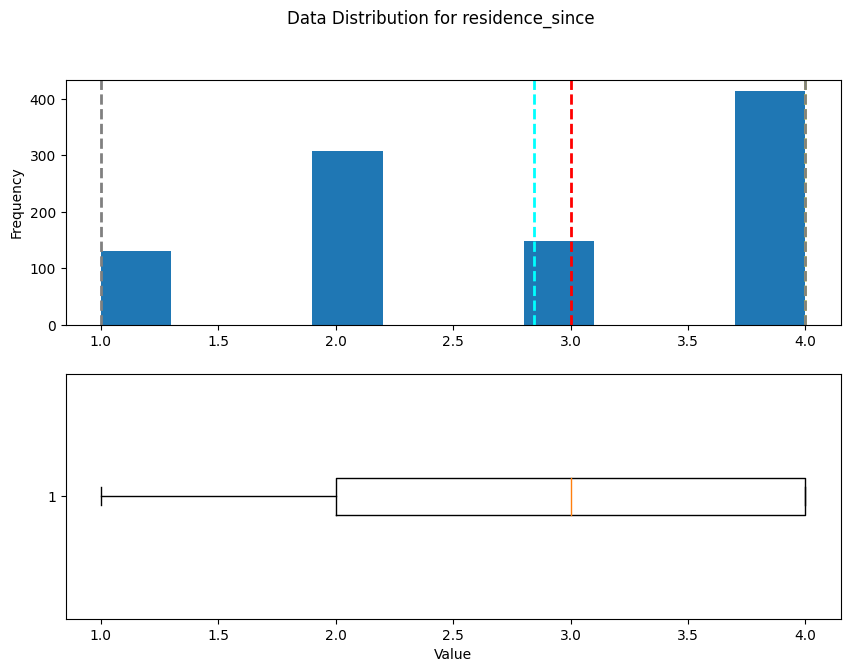

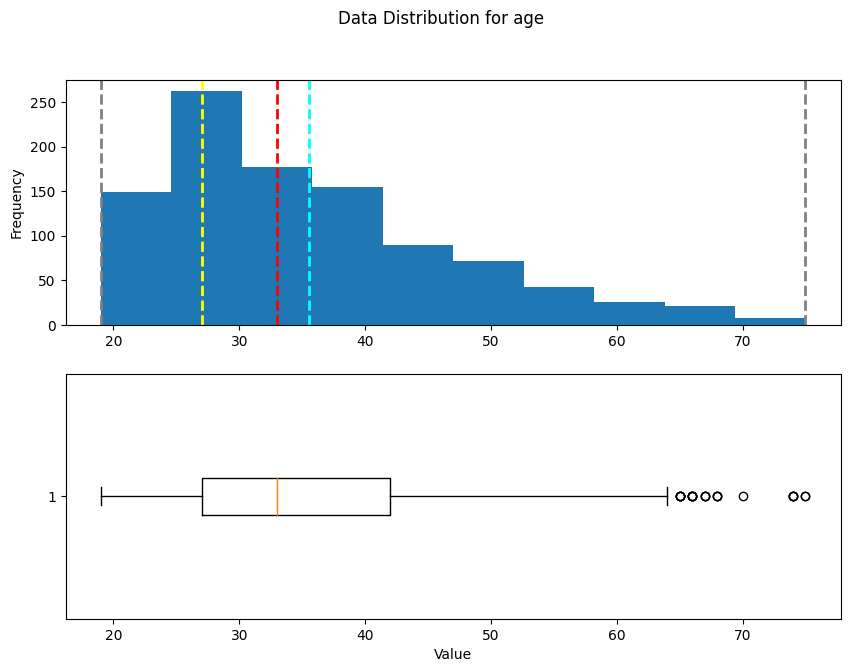

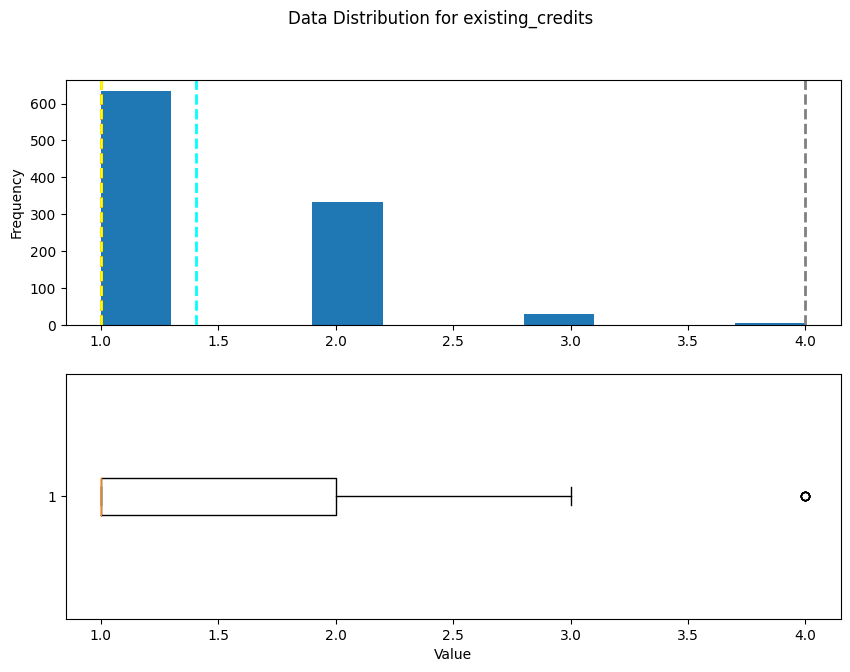

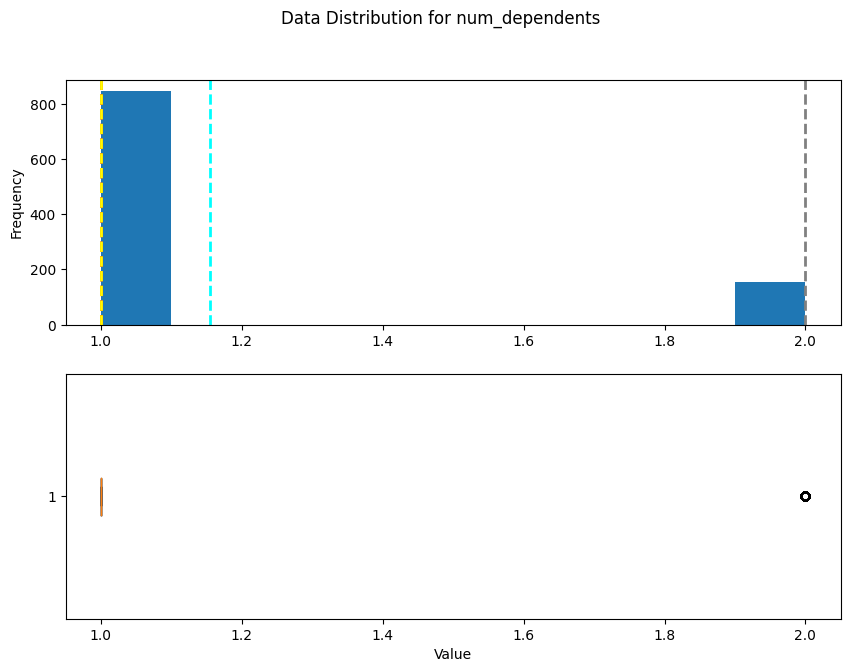

In [147]:
# Create a function that we can re-use
def show_distribution(var_data,col):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution for {col}')

    # Show the figure
    fig.show()

# Get the variable to examine

columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
for col_namne in columns_list:
    col = datasource[col_namne]
    # Call the function
    show_distribution(col,col_namne)


#### 1.3.2 For attributes has less unique values, the distribution for the target class(good & bad)

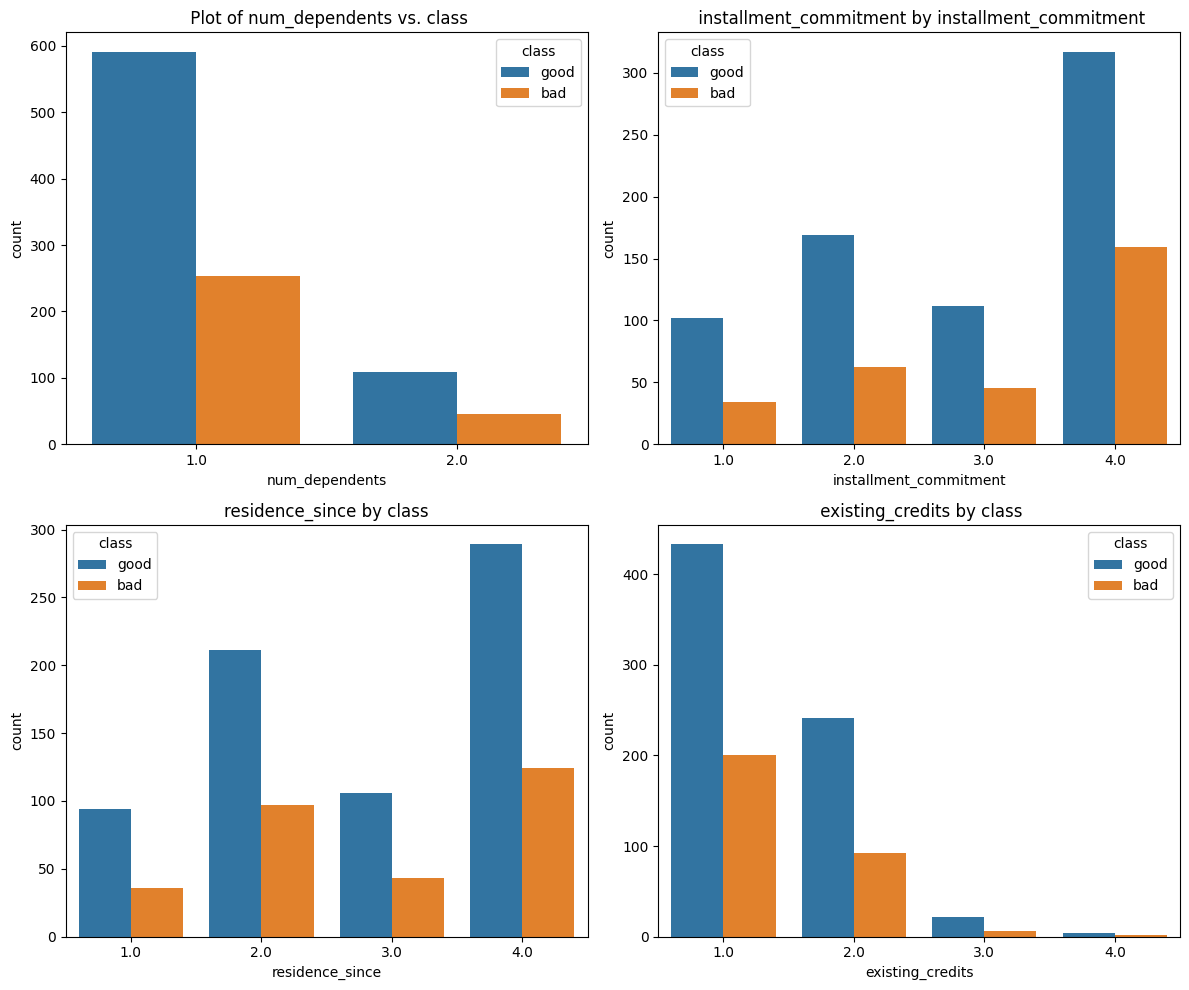

In [148]:
col_numeric_list = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


sns.countplot(data = datasource, x='num_dependents', hue='class', ax=axes[0, 0])
axes[0, 0].set_title(" Plot of num_dependents vs. class")


sns.countplot(data = datasource, x='installment_commitment',  hue='class', ax=axes[0, 1])
axes[0, 1].set_title(" installment_commitment by installment_commitment")


sns.countplot(data = datasource, x='residence_since', hue='class', ax=axes[1, 0])
axes[1, 0].set_title("residence_since by class")


sns.countplot(data = datasource, x='existing_credits', hue='class', ax=axes[1, 1])
axes[1, 1].set_title(" existing_credits by class")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### 1.3.3 For attributes has more unique values, the distribution for the target class(good & bad)

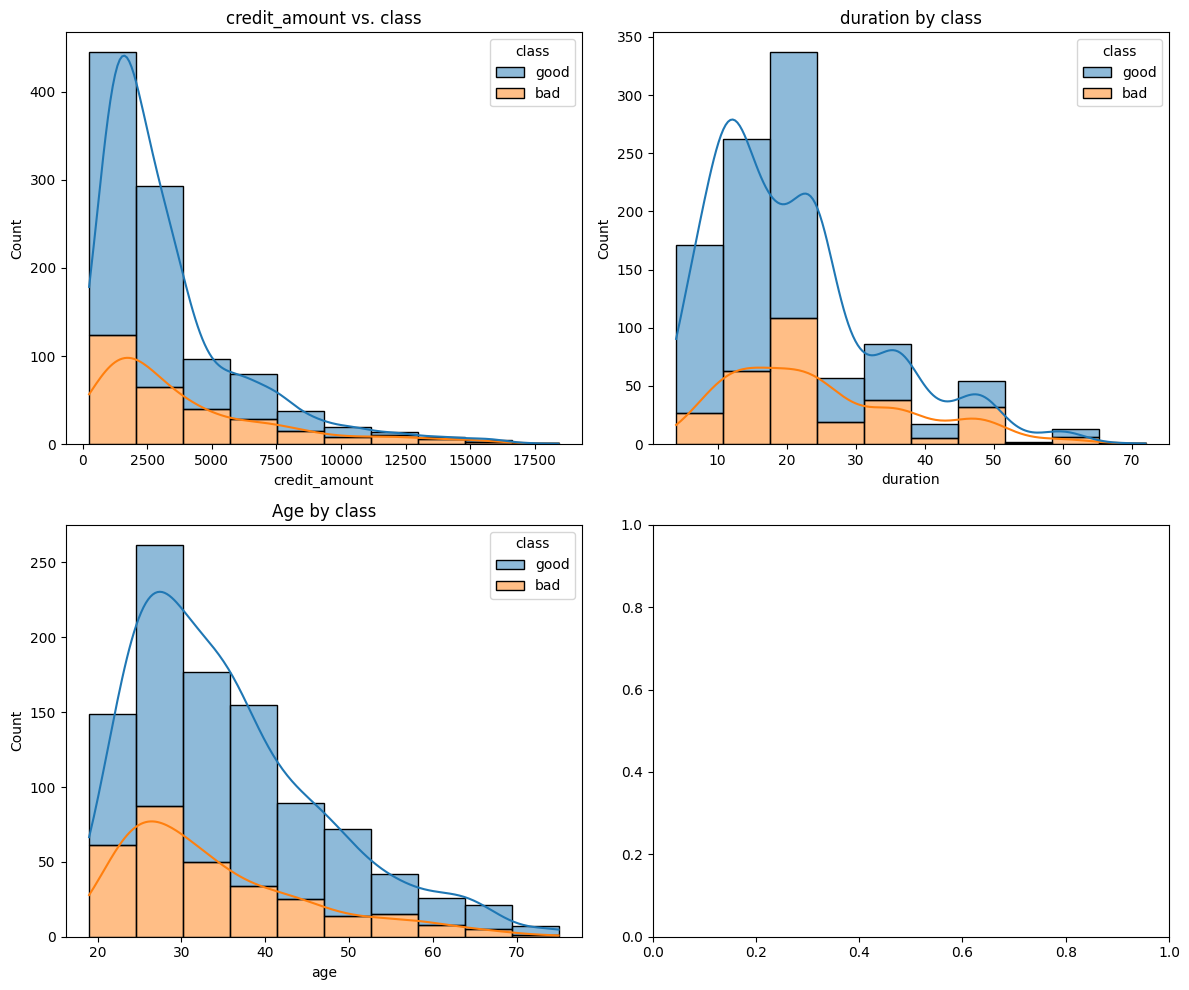

In [149]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


sns.histplot(data = datasource, x='credit_amount', hue='class', multiple='stack', bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("credit_amount vs. class")



sns.histplot(data = datasource, x='duration',  hue='class',multiple='stack', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("duration by class")


sns.histplot(data=datasource, x='age', hue='class', multiple='stack', bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age by class")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3.4 The distribution of credit amounts vs more continious coloumns

C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\36216986.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=datasource, x='duration', y='credit_amount', ci='sd', capsize=0.2, ax=axes[0, 0])
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\36216986.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=datasource, x='age', y='credit_amount', ci='sd', capsize=0.2, ax=axes[0, 1])


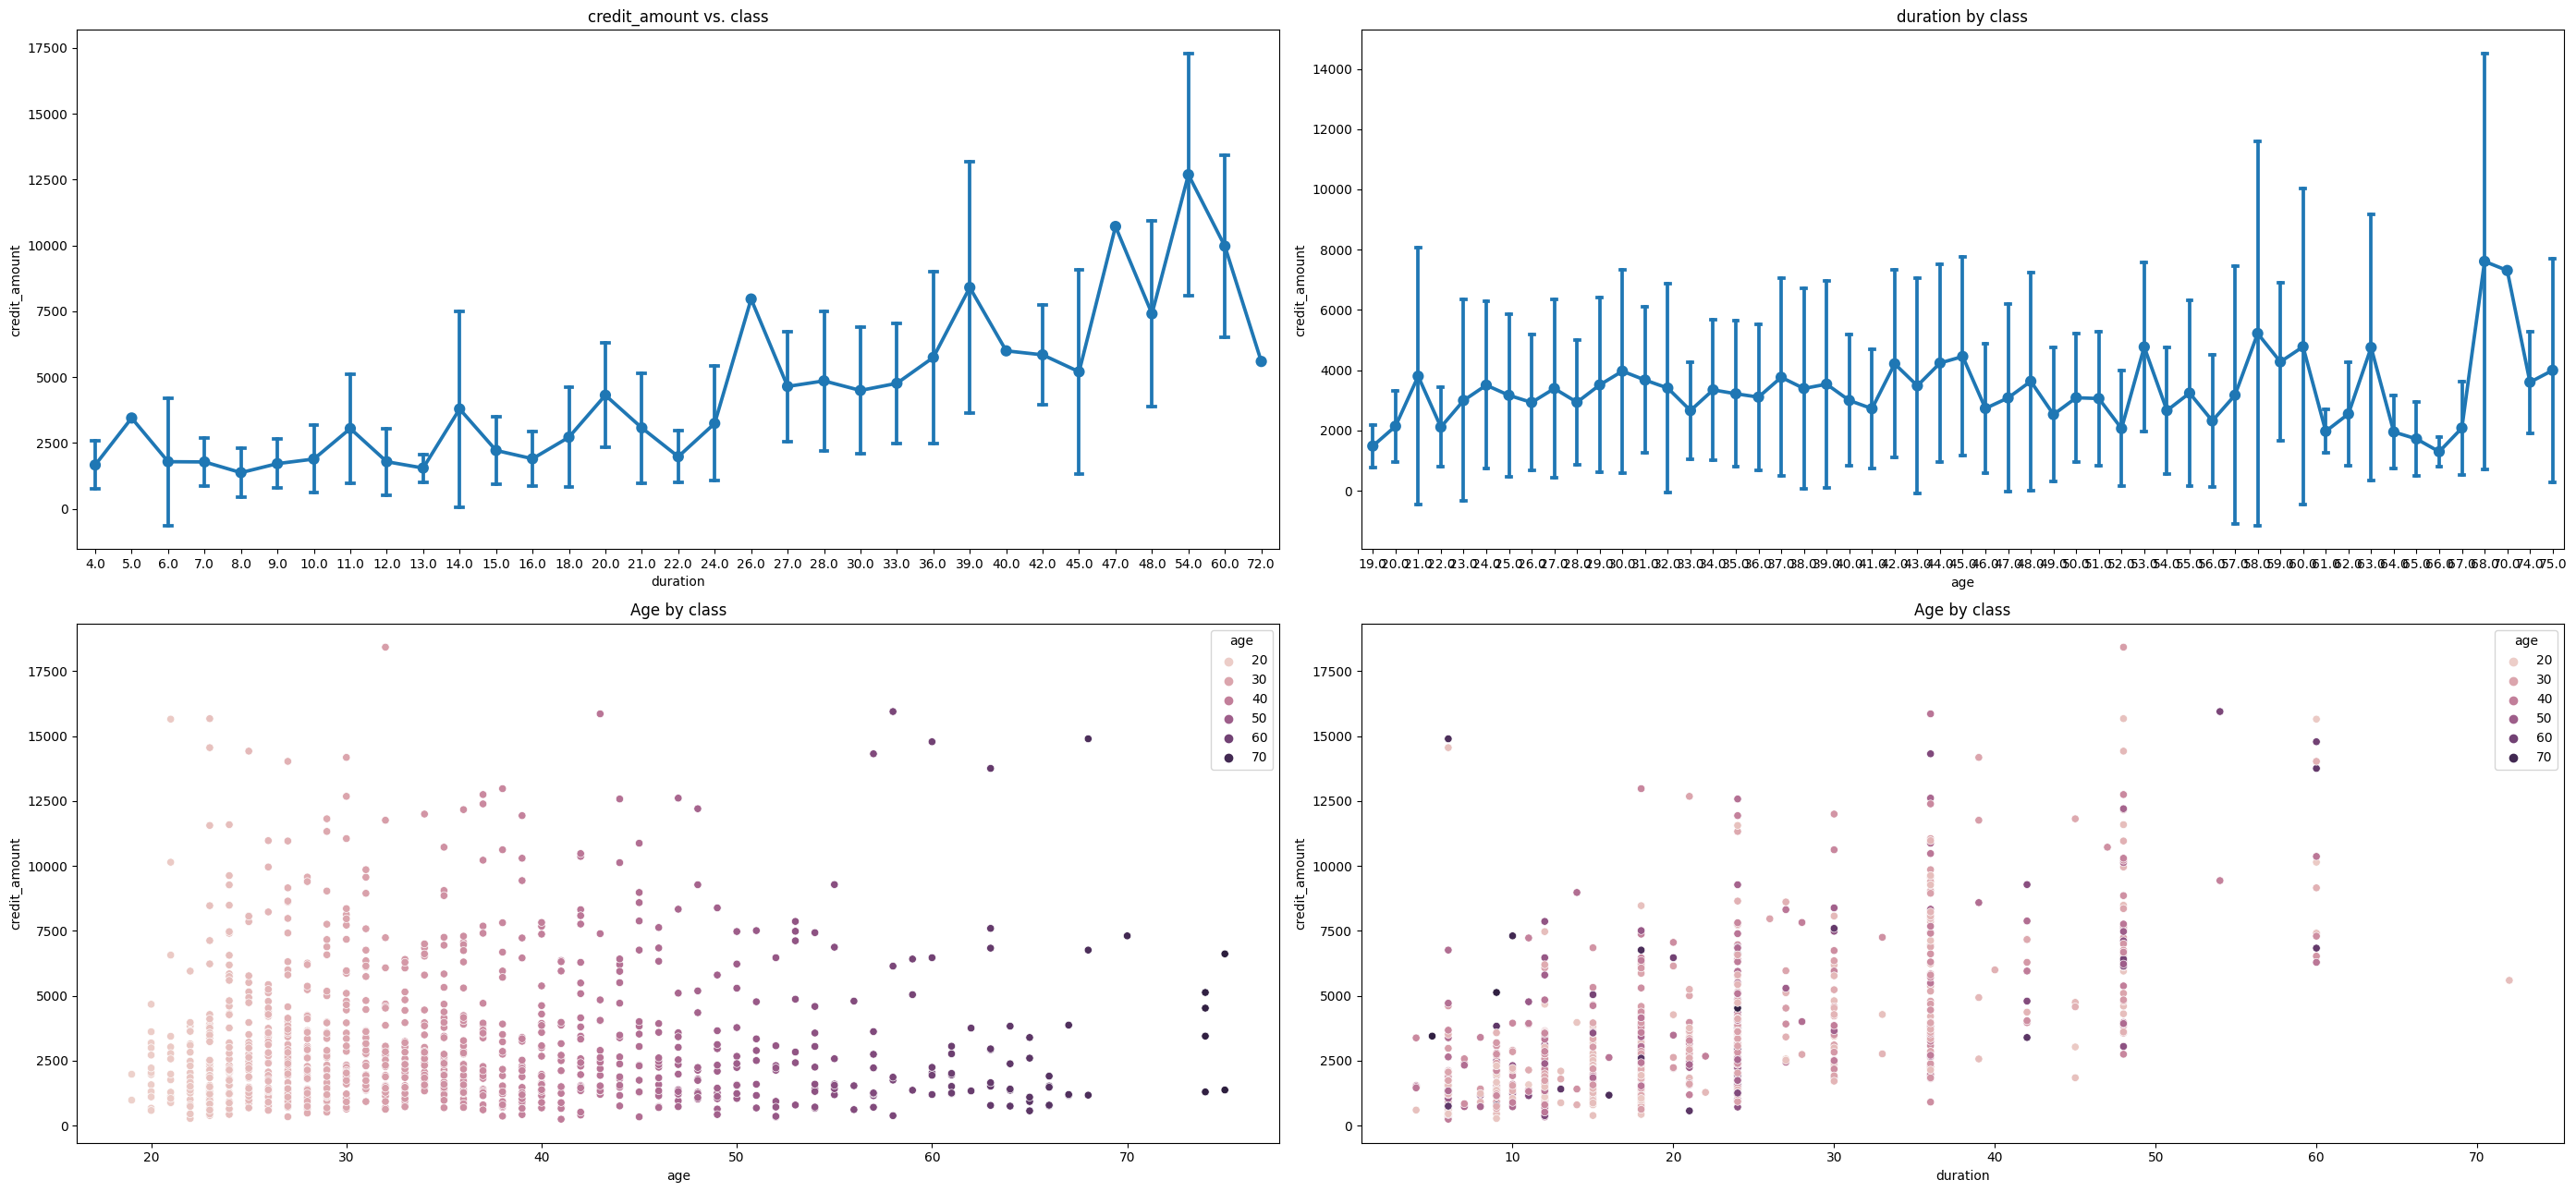

In [150]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 13))


sns.pointplot(data=datasource, x='duration', y='credit_amount', ci='sd', capsize=0.2, ax=axes[0, 0])
axes[0, 0].set_title("credit_amount vs. class")



sns.pointplot(data=datasource, x='age', y='credit_amount', ci='sd', capsize=0.2, ax=axes[0, 1])
axes[0, 1].set_title("duration by class")


sns.scatterplot(data = datasource, x='age', y='credit_amount', hue='age', ax=axes[1, 0])
axes[1, 0].set_title("Age by class")

sns.scatterplot(data = datasource, x='duration', y='credit_amount', hue='age', ax=axes[1, 1])
axes[1, 1].set_title("Age by class")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()



# col_numeric_list = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
# fig, ax = plt.subplots(1,2,figsize=(28,5))
# #sns.histplot(datasource, x='num_dependents',hue="class", bins=30, ax=ax[0]).set_title("Age/Family Size distribution");
# sns.pointplot(data=datasource, x='duration', y='credit_amount', ci='sd', capsize=0.2, ax=ax[0]).set_title("duration/credit_amount distribution")
# sns.pointplot(data=datasource, x='age', y='credit_amount', ci='sd', capsize=0.2, ax=ax[1]).set_title("age/credit_amount distribution")

### 1.3.5 Box plot for num_dependents vs other more continous variables

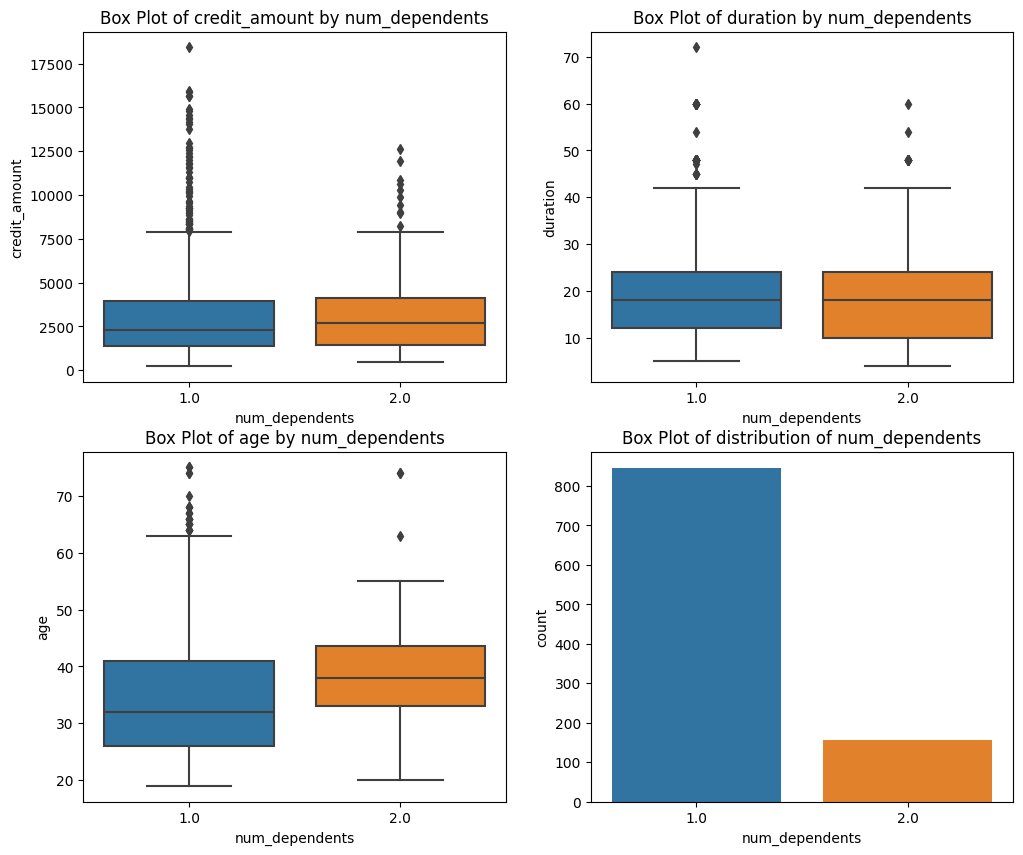

<Figure size 1500x600 with 0 Axes>

In [151]:
#num_dependents distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set up the figure and axes
plt.figure(figsize=(15, 6))


# Set plot labels and title


sns.boxplot(data=datasource, x='num_dependents', y='credit_amount', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of credit_amount by num_dependents")

sns.boxplot(data=datasource, x='num_dependents', y='duration', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of duration by num_dependents")

sns.boxplot(data=datasource, x='num_dependents', y='age', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of age by num_dependents")

sns.countplot(data=datasource, x='num_dependents', ax = axes[1, 1])
axes[1, 1].set_title("Box Plot of distribution of num_dependents")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3.6 Box plot for existing_credits vs other more continous variables

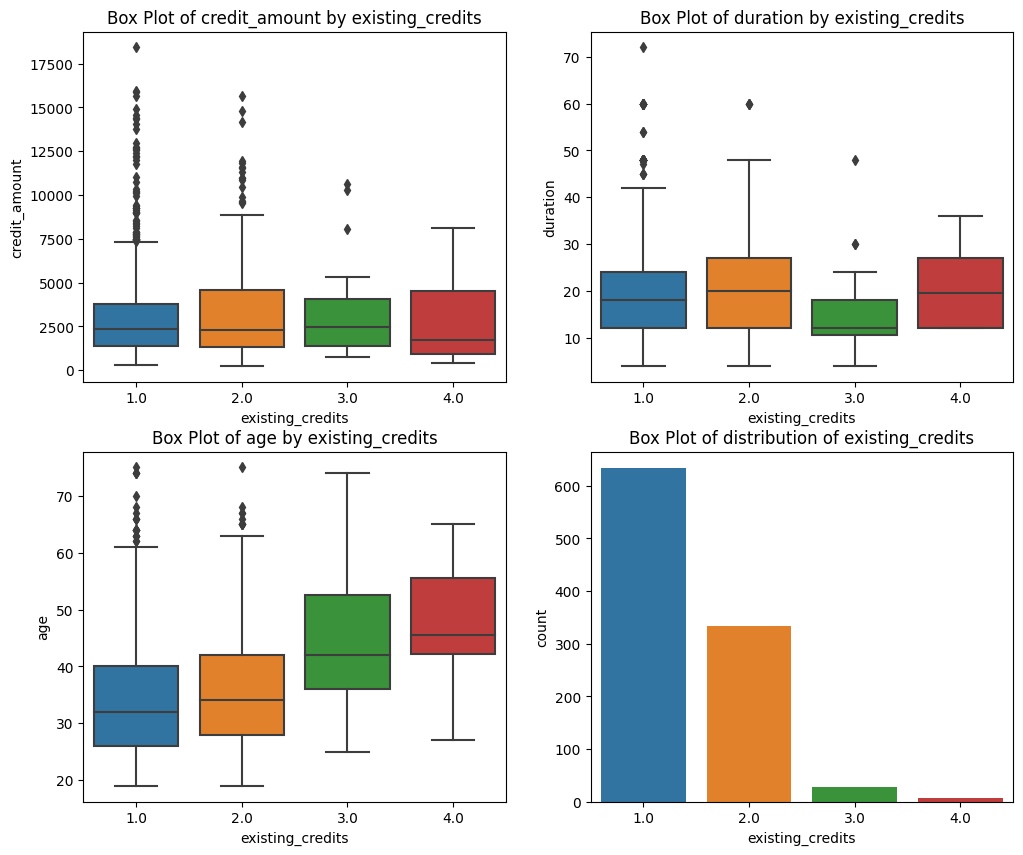

<Figure size 1500x600 with 0 Axes>

In [152]:
#existing_credits distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set up the figure and axes
plt.figure(figsize=(15, 6))


# Set plot labels and title


sns.boxplot(data=datasource, x='existing_credits', y='credit_amount', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of credit_amount by existing_credits")

sns.boxplot(data=datasource, x='existing_credits', y='duration', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of duration by existing_credits")

sns.boxplot(data=datasource, x='existing_credits', y='age', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of age by existing_credits")

sns.countplot(data=datasource, x='existing_credits', ax = axes[1, 1])
axes[1, 1].set_title("Box Plot of distribution of existing_credits")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3.7 Box plot for installment_commitment vs other more continous variables

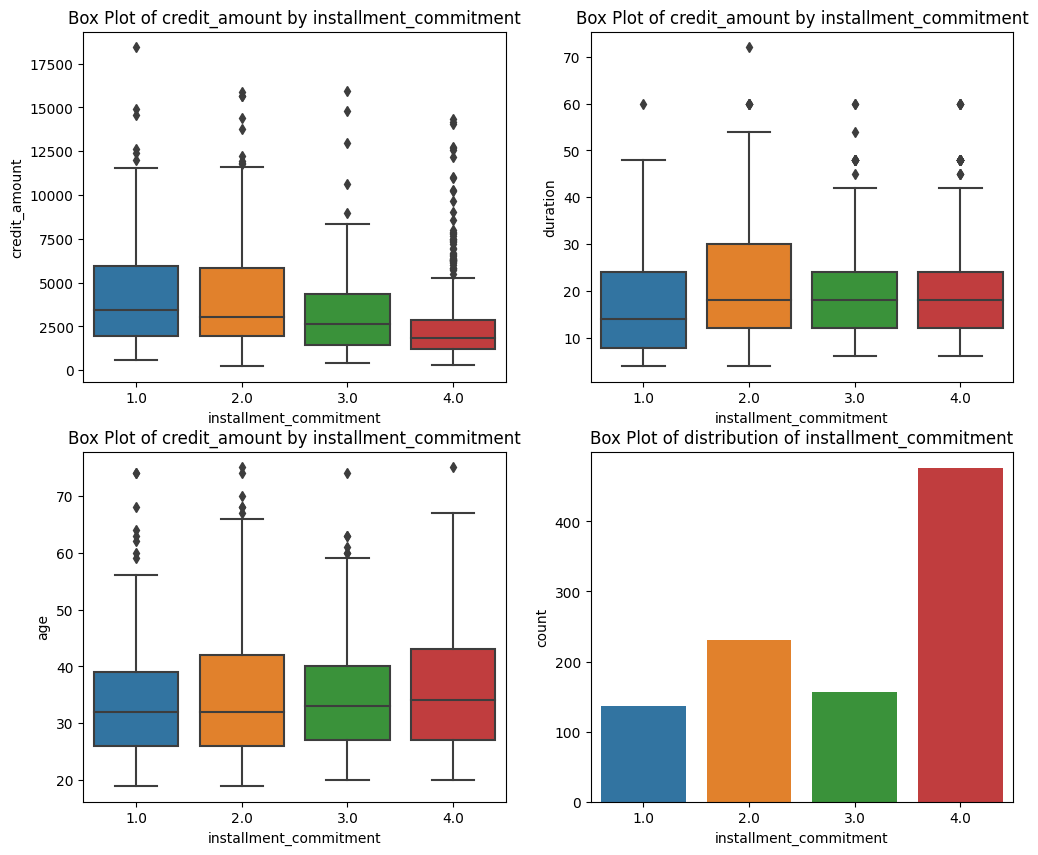

<Figure size 1500x600 with 0 Axes>

In [153]:
#installment_commitment distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set up the figure and axes
plt.figure(figsize=(15, 6))


# Set plot labels and title

sns.boxplot(data=datasource, x='installment_commitment', y='credit_amount', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of credit_amount by installment_commitment")

sns.boxplot(data=datasource, x='installment_commitment', y='duration', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of credit_amount by installment_commitment")

sns.boxplot(data=datasource, x='installment_commitment', y='age', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of credit_amount by installment_commitment")

sns.countplot(data=datasource, x='installment_commitment', ax = axes[1, 1])
axes[1, 1].set_title("Box Plot of distribution of installment_commitment")


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3.8 Box plot for residence_since vs other more continous variables

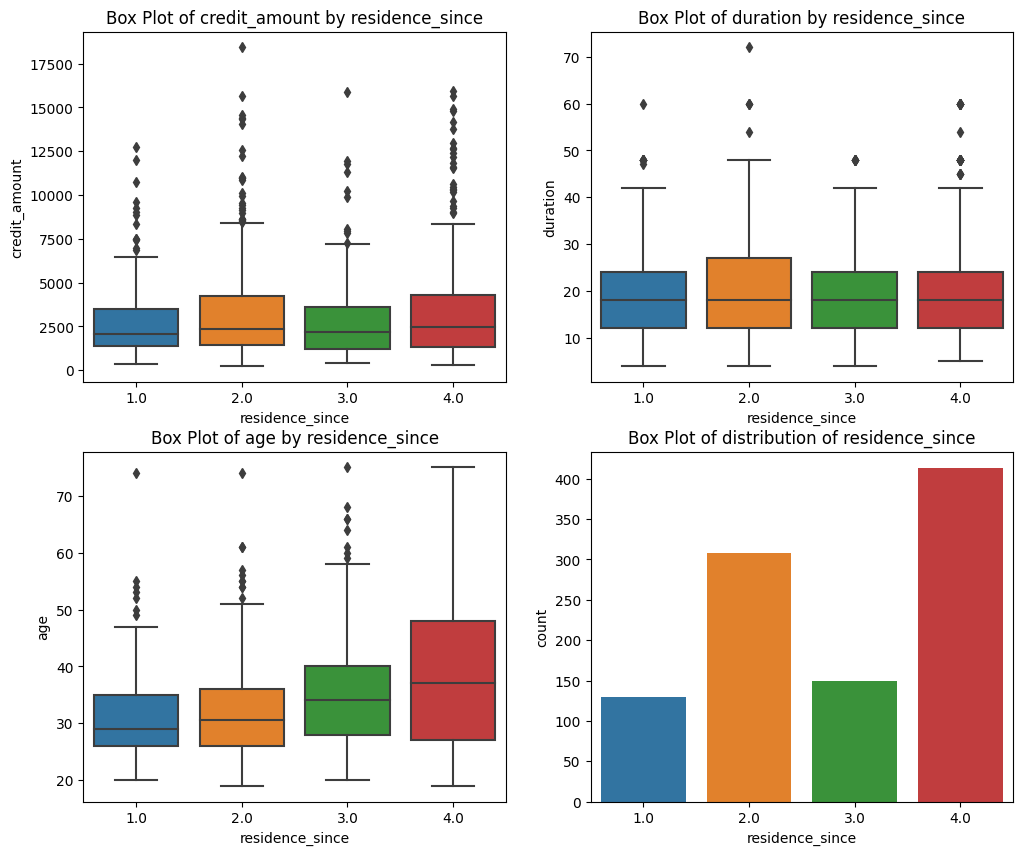

<Figure size 1500x600 with 0 Axes>

In [154]:
#residence_since distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set up the figure and axes
plt.figure(figsize=(15, 6))

# Set plot labels and title

sns.boxplot(data=datasource, x='residence_since', y='credit_amount', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of credit_amount by residence_since")

sns.boxplot(data=datasource, x='residence_since', y='duration', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of duration by residence_since")

sns.boxplot(data=datasource, x='residence_since', y='age', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of age by residence_since")

sns.countplot(data=datasource, x='residence_since', ax = axes[1, 1])
axes[1, 1].set_title("Box Plot of distribution of residence_since")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### 1.3.9 visualize the distribution of numeric attribute for each possible class value (good, bad)

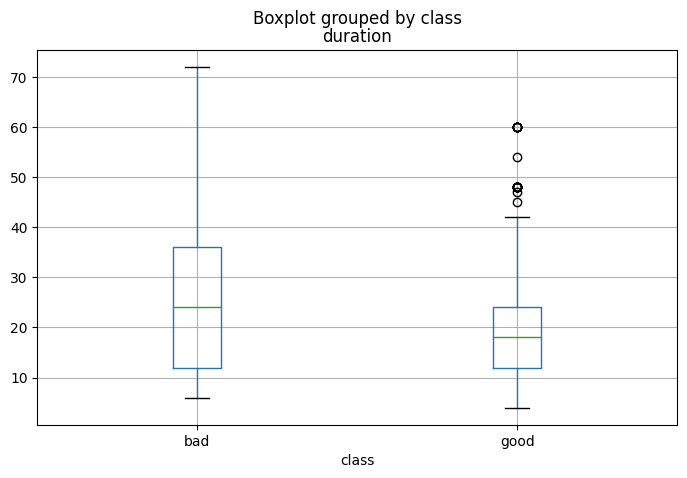

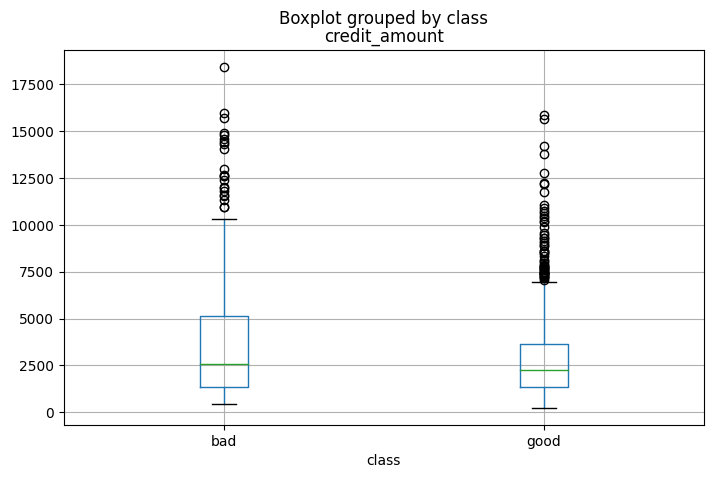

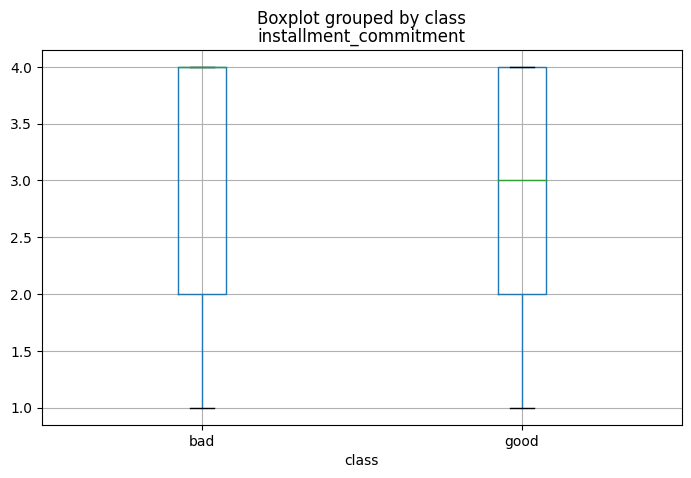

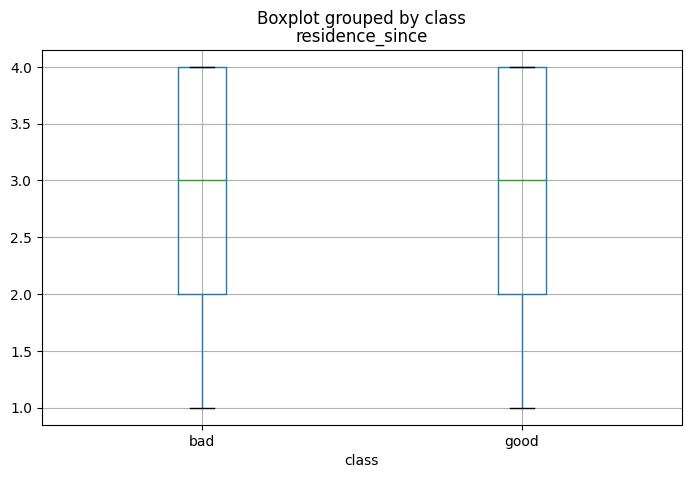

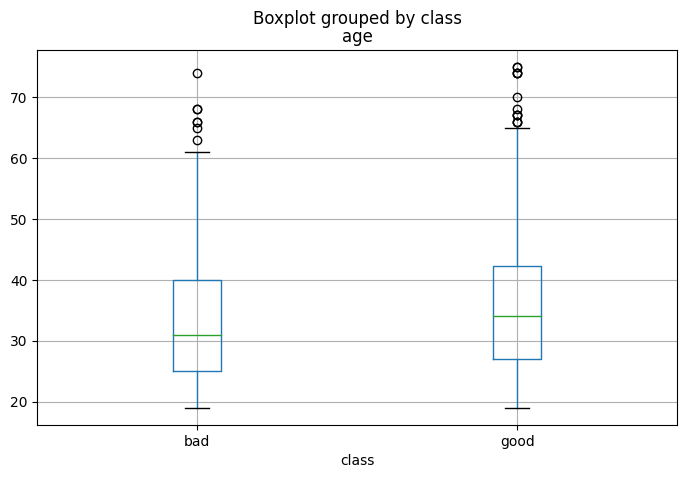

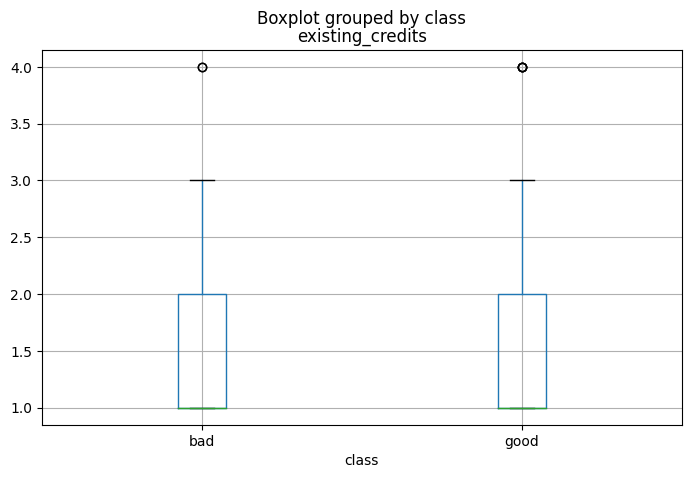

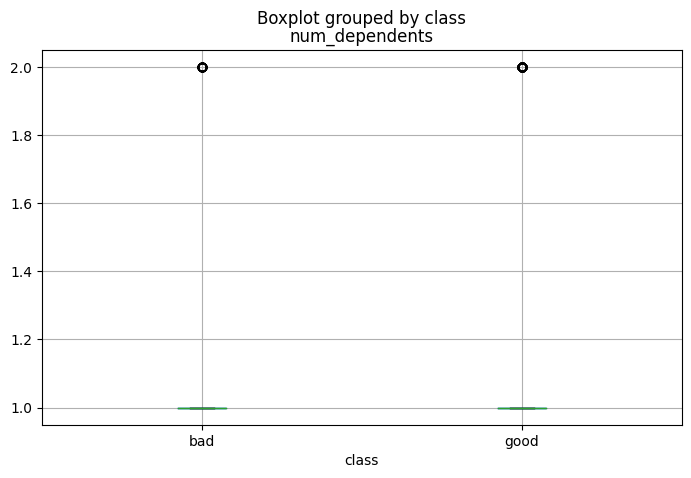

In [155]:
#showing the distribution of numeric attributes for each possible class value (A, B, C, D).
for col_namne in columns_list:

    datasource.boxplot(column = col_namne, by='class', figsize=(8,5))

### 1.4 Convert non-numeric variables to suitable datatype for future use

##### Before doing the datatype converting, we propose to convert data type in a copied datasource so that the conversion has no impact on the original data source, which we could use both data to compare the performance.

In [156]:
#copy the original dataset for further exploration and change
import copy


#datasource_datatypes = ds.dtypes
#print(datasource_datatypes)


#### 1.4.1 Convert data from non-numeric to numeric for further visualization and exploration
#### we mainly used label encoder, because one hot encoder may introduce multiple dimensions, and machine learning algorithms may suffer from curse of dimensionality
#### besides, some machine learning algorithm are not sensitive about order such as tree algorithms.

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
dstree = copy.deepcopy(datasource)

In [159]:
###tree data


checking_status_order = ["no checking", "<0", "0<=X<200", ">=200"]

dstree["checking_status"] = pd.Categorical(dstree["checking_status"],categories=checking_status_order,ordered=True)
dstree["checking_status"] = dstree["checking_status"].cat.codes

savings_status_order = ["no known savings","<100","100<=X<500","500<=X<1000",">=1000"]

dstree["savings_status"] = pd.Categorical(dstree["savings_status"],categories=savings_status_order,ordered=True)
dstree["savings_status"] = dstree["savings_status"].cat.codes

employment_order = ["unemployed","<1","1<=X<4","4<=X<7",">=7"]

dstree["employment"] = pd.Categorical(dstree["employment"],categories=employment_order,ordered=True)
dstree["employment"] = dstree["employment"].cat.codes
# Covert data type: one_hot encoder

#ds = pd.get_dummies(ds, columns=["purpose","personal_status","other_parties","property_magnitude","other_payment_plans","housing","own_telephone","foreign_worker","class"])

# Covert data type: Label encoder

credit_history_lb = LabelEncoder()
credit_history_lb.fit(dstree["credit_history"])

dstree["credit_history"] = credit_history_lb.transform(dstree["credit_history"])
###
job_lb = LabelEncoder()
job_lb.fit(dstree["job"])

dstree["job"] = job_lb.transform(dstree["job"])
###
purpose_lb = LabelEncoder()
purpose_lb.fit(dstree["purpose"])

dstree["purpose"] = purpose_lb.transform(dstree["purpose"])
###
personal_status_lb = LabelEncoder()
personal_status_lb.fit(dstree["personal_status"])

dstree["personal_status"] = personal_status_lb.transform(dstree["personal_status"])
###

other_parties_lb = LabelEncoder()
other_parties_lb.fit(dstree["other_parties"])

dstree["other_parties"] = other_parties_lb.transform(dstree["other_parties"])
#####
property_magnitude_lb = LabelEncoder()
property_magnitude_lb.fit(dstree["property_magnitude"])

dstree["property_magnitude"] = property_magnitude_lb.transform(dstree["property_magnitude"])

###
other_payment_plans_lb = LabelEncoder()
other_payment_plans_lb.fit(dstree["other_payment_plans"])

dstree["other_payment_plans"] = other_payment_plans_lb.transform(dstree["other_payment_plans"])
#####
housing_lb = LabelEncoder()
housing_lb.fit(dstree["housing"])

dstree["housing"] = housing_lb.transform(dstree["housing"])

###
own_telephone_lb = LabelEncoder()
own_telephone_lb.fit(dstree["own_telephone"])

dstree["own_telephone"] = own_telephone_lb.transform(dstree["own_telephone"])
####
foreign_worker_lb = LabelEncoder()
foreign_worker_lb.fit(dstree["foreign_worker"])

dstree["foreign_worker"] = foreign_worker_lb.transform(dstree["foreign_worker"])

###
class_lb = LabelEncoder()
class_lb.fit(dstree["class"])

dstree["class"] = class_lb.transform(dstree["class"])



In [160]:
datasource_datatypes = dstree.dtypes
print(datasource_datatypes)

checking_status              int8
duration                  float64
credit_history              int32
purpose                     int32
credit_amount             float64
savings_status               int8
employment                   int8
installment_commitment    float64
personal_status             int32
other_parties               int32
residence_since           float64
property_magnitude          int32
age                       float64
other_payment_plans         int32
housing                     int32
existing_credits          float64
job                         int32
num_dependents            float64
own_telephone               int32
foreign_worker              int32
class                       int32
dtype: object


In [161]:
column_list = dstree.columns
print(column_list)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [162]:
dstree.head(3)

checking_status  duration  credit_history  purpose  credit_amount  \
0                1       6.0               1        6         1169.0   
1                2      48.0               3        6         5951.0   
2                0      12.0               1        2         2096.0   

   savings_status  employment  installment_commitment  personal_status  \
0               0           4                     4.0                3   
1               1           2                     2.0                0   
2               1           3                     2.0                3   

   other_parties  ...  property_magnitude   age  other_payment_plans  housing  \
0              2  ...                   3  67.0                    1        1   
1              2  ...                   3  22.0                    1        1   
2              2  ...                   3  49.0                    1        1   

   existing_credits  job  num_dependents  own_telephone  foreign_worker  class  
0               2.0    1             1.0              1               1      1  
1               1.0    1             1.0              0               1      0  
2               1.0    3             2.0              0               1      1  

[3 rows x 21 columns]

In [163]:
datasource

checking_status  duration                  credit_history  \
0                <0       6.0  critical/other existing credit   
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1<=X<4   
2              education         2096.0              <100      4<=X<7   
3    furniture/equipment         7882.0              <100      4<=X<7   
4                new car         4870.0              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment         1736.0              <100      4<=X<7   
996             used car         3857.0              <100      1<=X<4   
997             radio/tv          804.0              <100         >=7   
998             radio/tv         1845.0              <100      1<=X<4   
999             used car         4576.0        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
0                       4.0         male single          none  ...   
1                       2.0  female div/dep/mar          none  ...   
2                       2.0         male single          none  ...   
3                       2.0         male single     guarantor  ...   
4                       3.0         male single          none  ...   
..                      ...                 ...           ...  ...   
995                     3.0  female div/dep/mar          none  ...   
996                     4.0        male div/sep          none  ...   
997                     4.0         male single          none  ...   
998                     4.0         male single          none  ...   
999                     3.0         male single          none  ...   

     property_magnitude   age  other_payment_plans   housing existing_credits  \
0           real estate  67.0                 none       own              2.0   
1           real estate  22.0                 none       own              1.0   
2           real estate  49.0                 none       own              1.0   
3        life insurance  45.0                 none  for free              1.0   
4     no known property  53.0                 none  for free              2.0   
..                  ...   ...                  ...       ...              ...   
995         real estate  31.0                 none       own              1.0   
996      life insurance  40.0                 none       own              1.0   
997                 car  38.0                 none       own              1.0   
998   no known property  23.0                 none  for free              1.0   
999                 car  27.0                 none       own              1.0   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled            1.0            yes            yes   
1                      skilled            1.0           none            yes   
2           unskilled resident            2.0           none            yes   
3                      skilled            2.0           none            yes   
4                      skilled            2.0           none            yes   
..                         ...            ...            .

### 1.4.2 As some of the machine learning algorithm may sensitive to the order of the attributes, so that we convert some of the data into numeric type by one hot encoder to have better performance (this is a supplyment for specific algorithm, not for visualization use as the dimensions are too large) not for use


In [164]:
# ##for SVM


# # Cover data type: ordinal encoder

# checking_status_order = ["no checking","<0","0<=X<200", ">=200"]

# ds["checking_status"] = pd.Categorical(ds["checking_status"],categories=checking_status_order,ordered=True)
# ds["checking_status"] = ds["checking_status"].cat.codes

# savings_status_order = ["no known savings","<100","100<=X<500","500<=X<1000",">=1000"]

# ds["savings_status"] = pd.Categorical(ds["savings_status"],categories=savings_status_order,ordered=True)
# ds["savings_status"] = ds["savings_status"].cat.codes

# employment_order = ["unemployed","<1","1<=X<4","4<=X<7",">=7"]

# ds["employment"] = pd.Categorical(ds["employment"],categories=employment_order,ordered=True)
# ds["employment"] = ds["employment"].cat.codes
# # Covert data type: one_hot encoder

# ds = pd.get_dummies(ds, columns=["purpose","personal_status","other_parties","property_magnitude","other_payment_plans","housing","foreign_worker"])

# # Covert data type: Label encoder

# credit_history_lb = LabelEncoder()
# credit_history_lb.fit(ds["credit_history"])

# ds["credit_history"] = credit_history_lb.transform(ds["credit_history"])

# job_lb = LabelEncoder()
# job_lb.fit(ds["job"])

# ds["job"] = job_lb.transform(ds["job"])

# class_lb = LabelEncoder()
# class_lb.fit(ds["class"])

# ds["class"] = class_lb.transform(ds["class"])

# own_telephone_lb = LabelEncoder()
# own_telephone_lb.fit(ds["own_telephone"])

# ds["own_telephone"] = own_telephone_lb.transform(ds["own_telephone"])



# #ds = ds.astype(int)


#### 1.4.3 get the after change columns name (using the label encoder convert the datatype)

In [165]:
numeric_columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
columns_list_after_change = dstree.drop(columns = numeric_columns_list)
print(columns_list_after_change.columns)


Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


## 2. Visualise data

#### 2.1 Visualize the changed unique values for dstree 

In [166]:
print(dstree.nunique())

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64


### 2.1.1 View the changed variables in box plot 

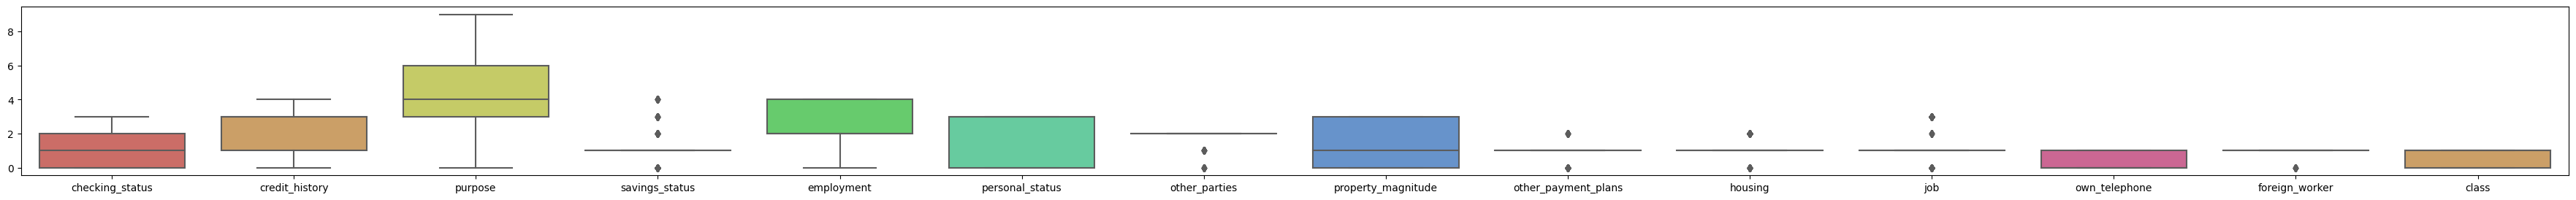

In [167]:
current_plaette = sns.color_palette("hls", 12)#color
# column_to_drop = 'ID'
# df_withoutid = ds.drop(column_to_drop, axis = 1)
plt.figure(figsize=(45, 3))

#df_without_id = df_withoutid[['Segmentation', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']].copy()
sns.boxplot(data = columns_list_after_change, palette = current_plaette)#plot boxplot

plt.show()

Class Counts:
checking_status
0    394
1    274
2    269
3     63
Name: count, dtype: int64

Class Proportions:
checking_status
0    0.394
1    0.274
2    0.269
3    0.063
Name: count, dtype: float64


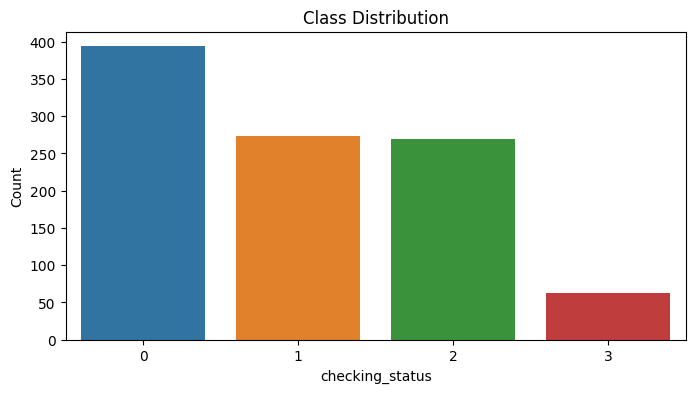

Class Counts:
credit_history
3    530
1    293
2     88
0     49
4     40
Name: count, dtype: int64

Class Proportions:
credit_history
3    0.530
1    0.293
2    0.088
0    0.049
4    0.040
Name: count, dtype: float64


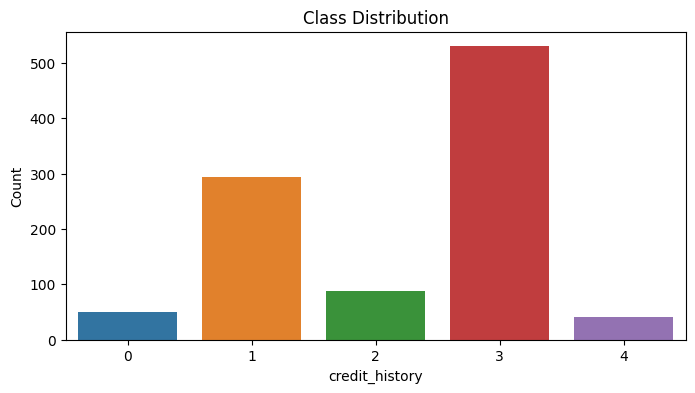

Class Counts:
purpose
6    280
4    234
3    181
9    103
0     97
2     50
7     22
1     12
5     12
8      9
Name: count, dtype: int64

Class Proportions:
purpose
6    0.280
4    0.234
3    0.181
9    0.103
0    0.097
2    0.050
7    0.022
1    0.012
5    0.012
8    0.009
Name: count, dtype: float64


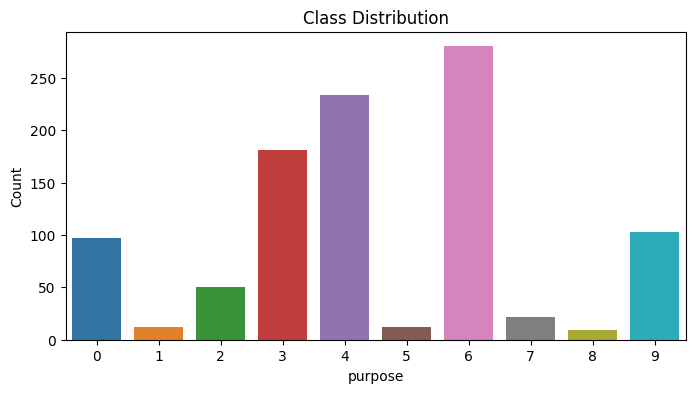

Class Counts:
savings_status
1    603
0    183
2    103
3     63
4     48
Name: count, dtype: int64

Class Proportions:
savings_status
1    0.603
0    0.183
2    0.103
3    0.063
4    0.048
Name: count, dtype: float64


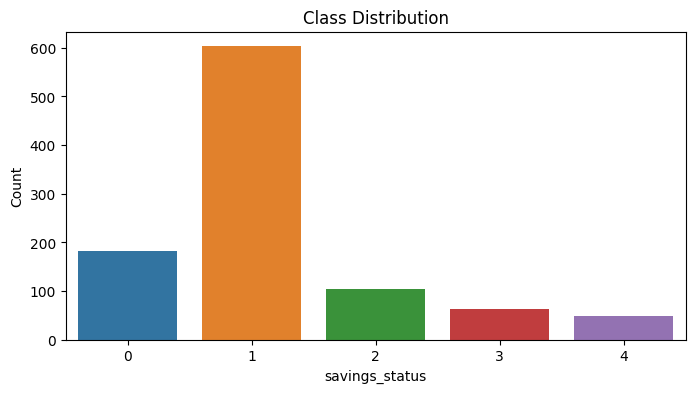

Class Counts:
employment
2    339
4    253
3    174
1    172
0     62
Name: count, dtype: int64

Class Proportions:
employment
2    0.339
4    0.253
3    0.174
1    0.172
0    0.062
Name: count, dtype: float64


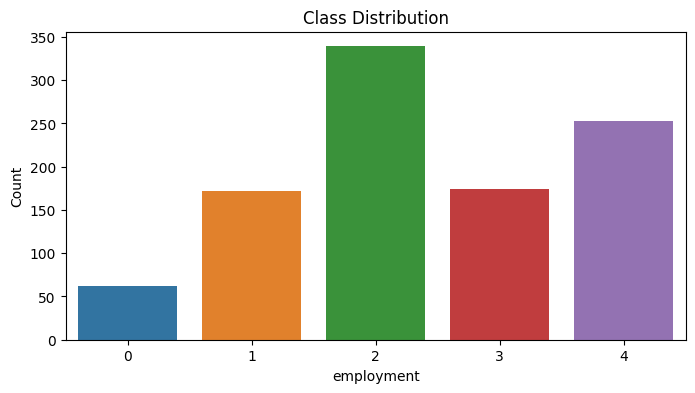

Class Counts:
personal_status
3    548
0    310
2     92
1     50
Name: count, dtype: int64

Class Proportions:
personal_status
3    0.548
0    0.310
2    0.092
1    0.050
Name: count, dtype: float64


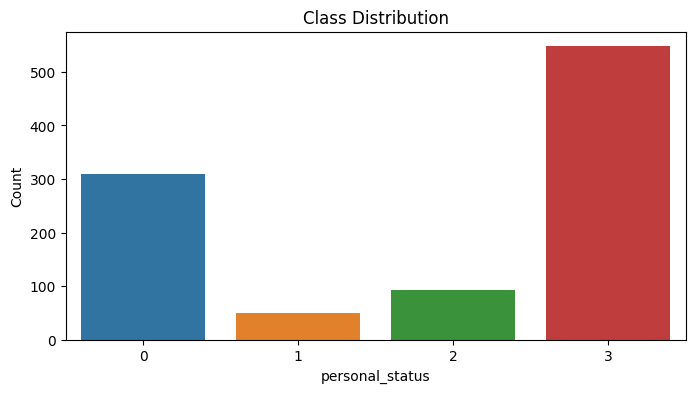

Class Counts:
other_parties
2    907
1     52
0     41
Name: count, dtype: int64

Class Proportions:
other_parties
2    0.907
1    0.052
0    0.041
Name: count, dtype: float64


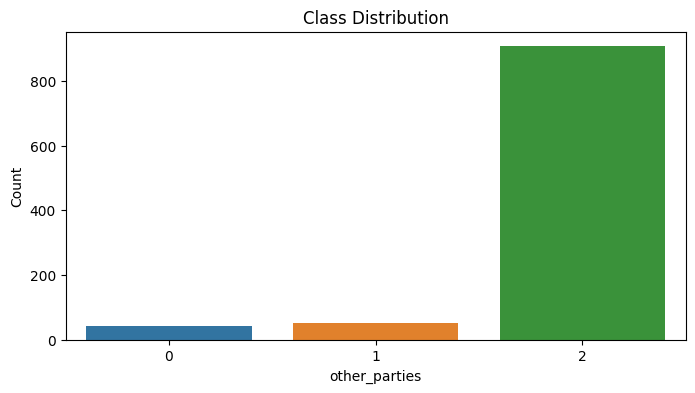

Class Counts:
property_magnitude
0    332
3    282
1    232
2    154
Name: count, dtype: int64

Class Proportions:
property_magnitude
0    0.332
3    0.282
1    0.232
2    0.154
Name: count, dtype: float64


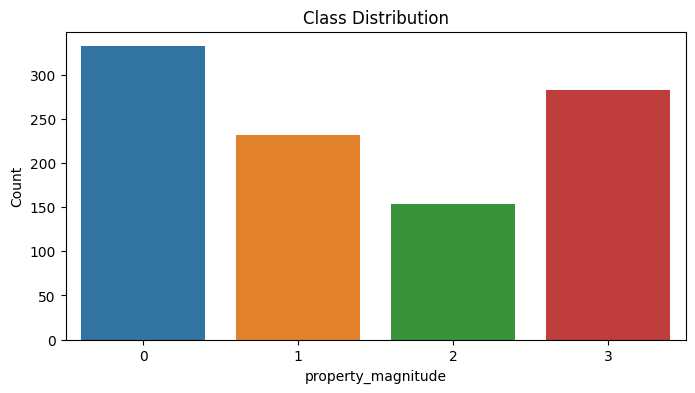

Class Counts:
other_payment_plans
1    814
0    139
2     47
Name: count, dtype: int64

Class Proportions:
other_payment_plans
1    0.814
0    0.139
2    0.047
Name: count, dtype: float64


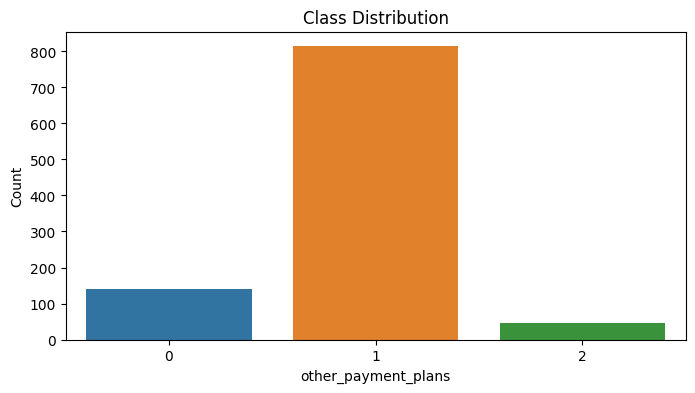

Class Counts:
housing
1    713
2    179
0    108
Name: count, dtype: int64

Class Proportions:
housing
1    0.713
2    0.179
0    0.108
Name: count, dtype: float64


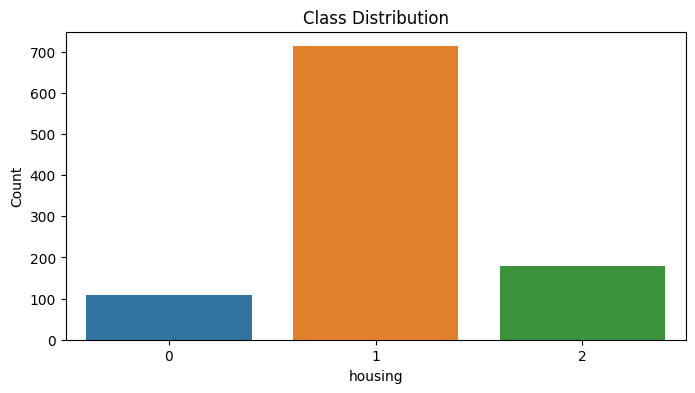

Class Counts:
job
1    630
3    200
0    148
2     22
Name: count, dtype: int64

Class Proportions:
job
1    0.630
3    0.200
0    0.148
2    0.022
Name: count, dtype: float64


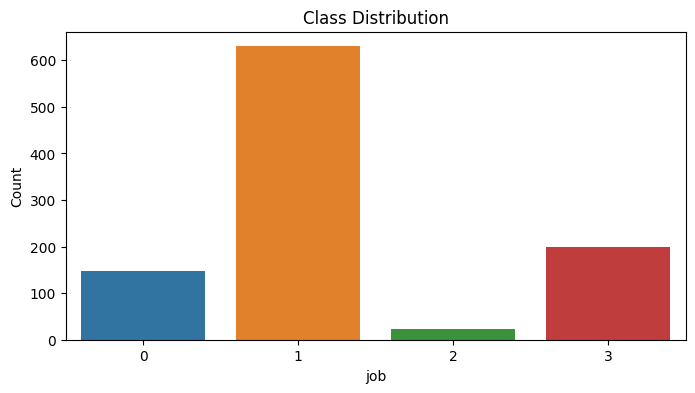

Class Counts:
own_telephone
0    596
1    404
Name: count, dtype: int64

Class Proportions:
own_telephone
0    0.596
1    0.404
Name: count, dtype: float64


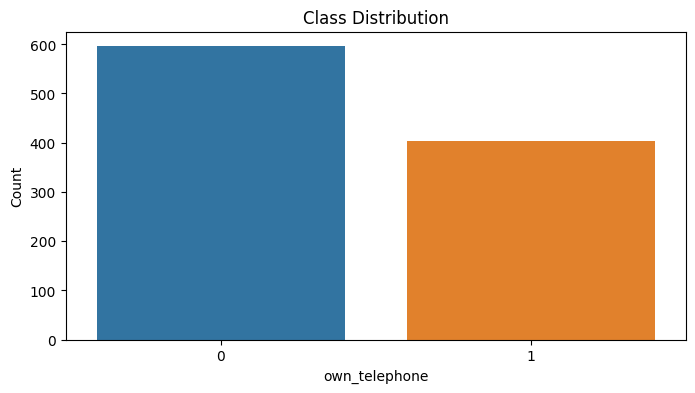

Class Counts:
foreign_worker
1    963
0     37
Name: count, dtype: int64

Class Proportions:
foreign_worker
1    0.963
0    0.037
Name: count, dtype: float64


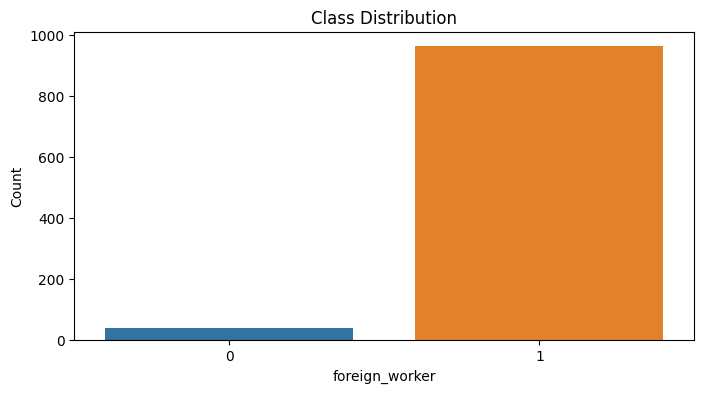

Class Counts:
class
1    700
0    300
Name: count, dtype: int64

Class Proportions:
class
1    0.7
0    0.3
Name: count, dtype: float64


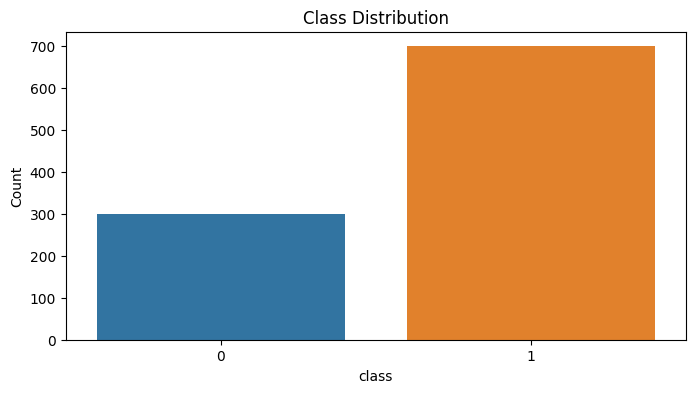

In [168]:
for col_namne in columns_list_after_change:
    class_counts = columns_list_after_change[col_namne].value_counts()

# calculate the proportion
    class_proportions = class_counts / class_counts.sum()

# print distribution
    print("Class Counts:")
    print(class_counts)
    print("\nClass Proportions:")
    print(class_proportions)

# draw the distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=columns_list_after_change, x=col_namne)
    plt.title("Class Distribution")
    plt.xlabel(f"{col_namne}")
    plt.ylabel("Count")
    plt.show()

#### We could notice the target class in unbalanced with good 300 bad 700

Minimum:0.00
Mean:1.00
Median:1.00
Mode:0.00
Maximum:3.00

Minimum:0.00
Mean:2.22
Median:3.00
Mode:3.00
Maximum:4.00

Minimum:0.00
Mean:4.48
Median:4.00
Mode:6.00
Maximum:9.00



C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using m

Minimum:0.00
Mean:1.19
Median:1.00
Mode:1.00
Maximum:4.00

Minimum:0.00
Mean:2.38
Median:2.00
Mode:2.00
Maximum:4.00

Minimum:0.00
Mean:1.88
Median:3.00
Mode:3.00
Maximum:3.00

Minimum:0.00
Mean:1.87
Median:2.00
Mode:2.00
Maximum:2.00

Minimum:0.00
Mean:1.39
Median:1.00
Mode:0.00
Maximum:3.00

Minimum:0.00
Mean:0.91
Median:1.00
Mode:1.00
Maximum:2.00

Minimum:0.00
Mean:1.07
Median:1.00
Mode:1.00
Maximum:2.00

Minimum:0.00
Mean:1.27
Median:1.00
Mode:1.00
Maximum:3.00

Minimum:0.00
Mean:0.40
Median:0.00
Mode:0.00
Maximum:1.00

Minimum:0.00
Mean:0.96
Median:1.00
Mode:1.00
Maximum:1.00

Minimum:0.00
Mean:0.70
Median:1.00
Mode:1.00
Maximum:1.00



C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kitty\AppData\Local\Temp\ipykernel_44812\3095188806.py:39: UserWarning: Matplotlib is currently using m

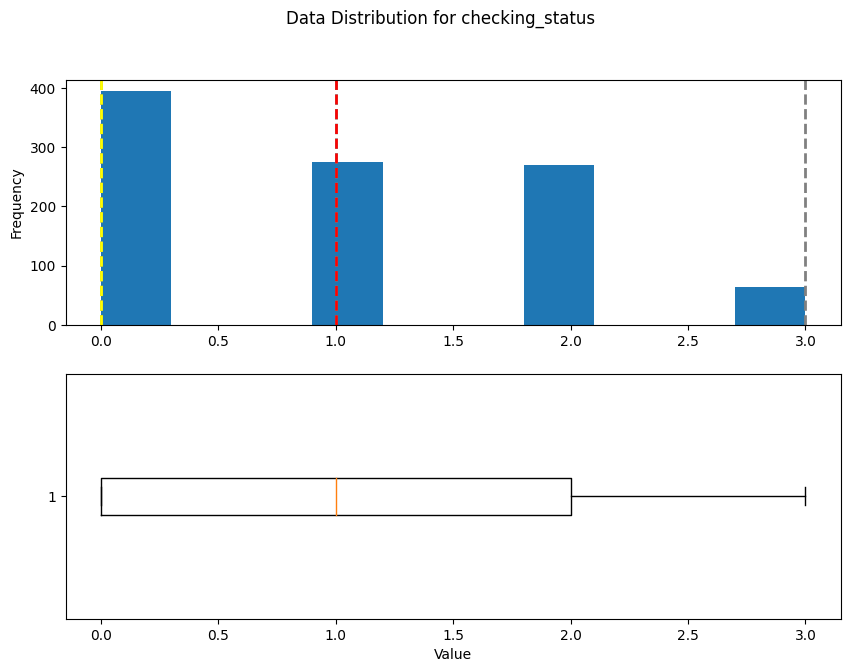

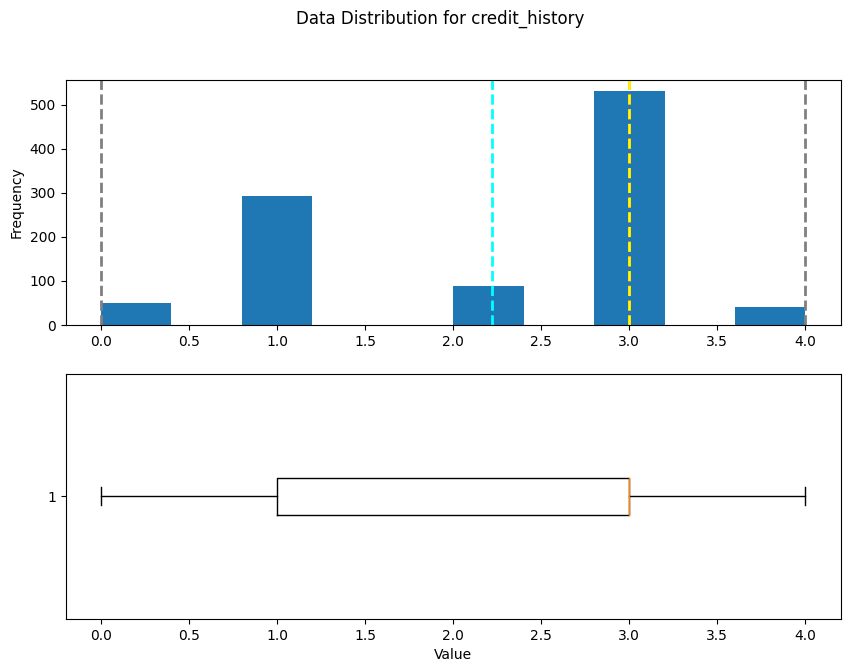

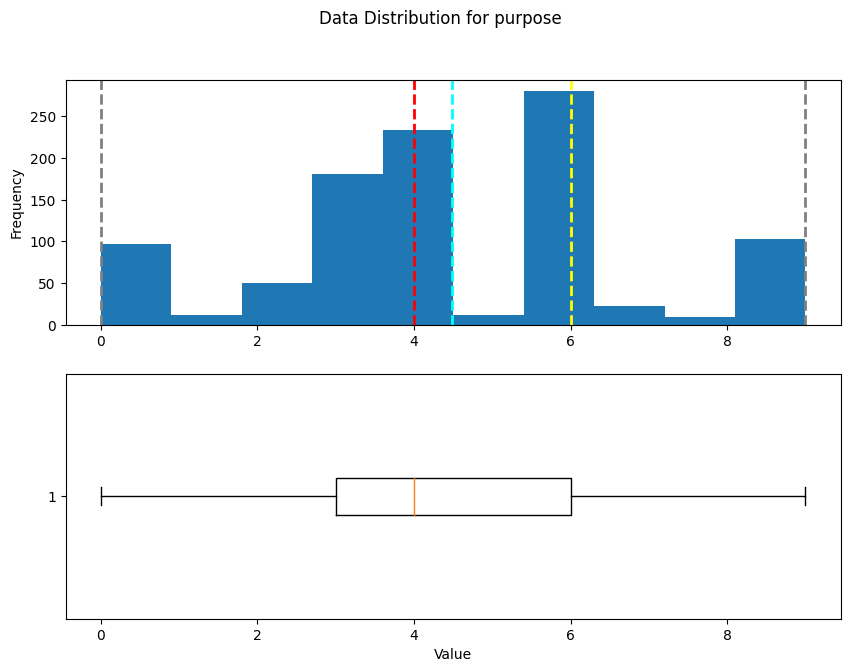

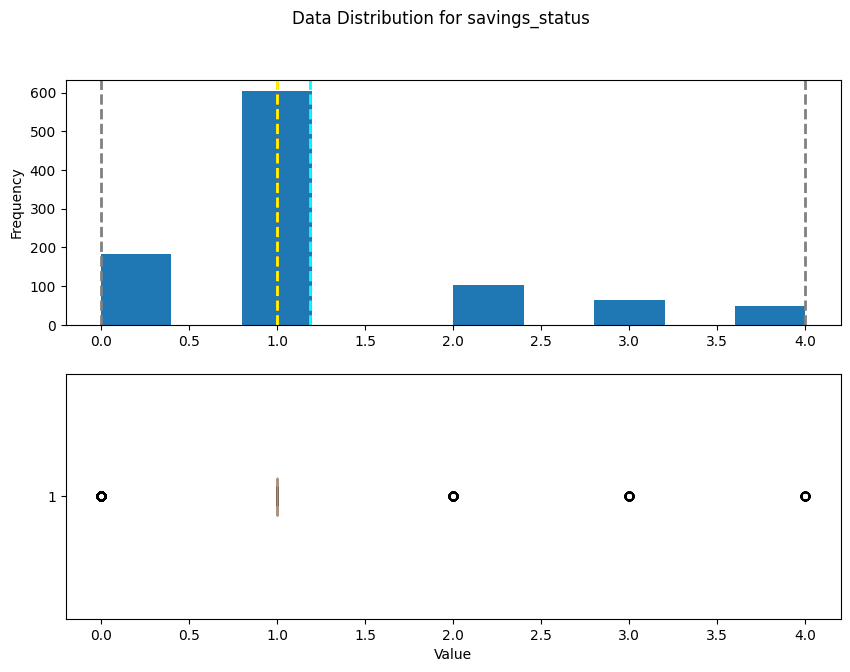

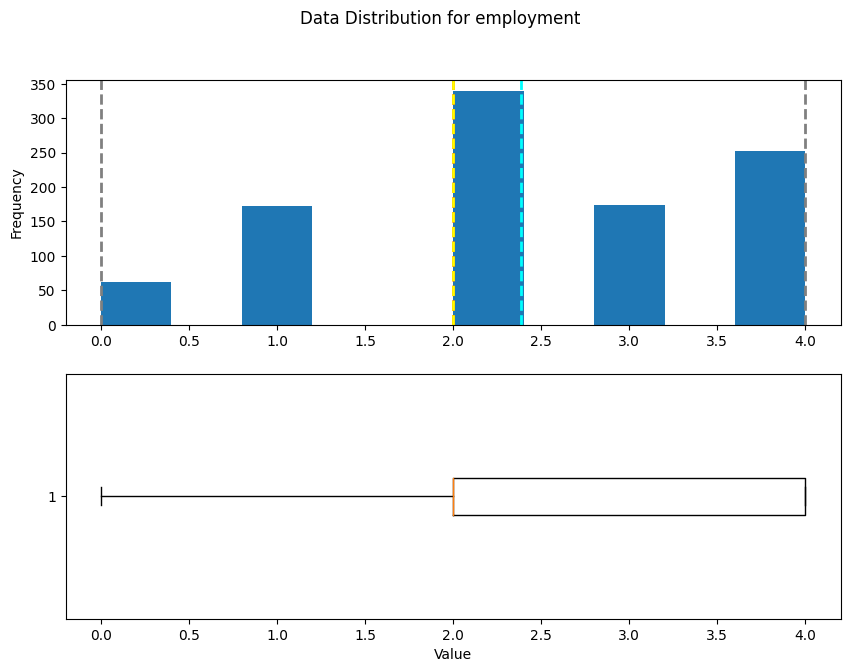

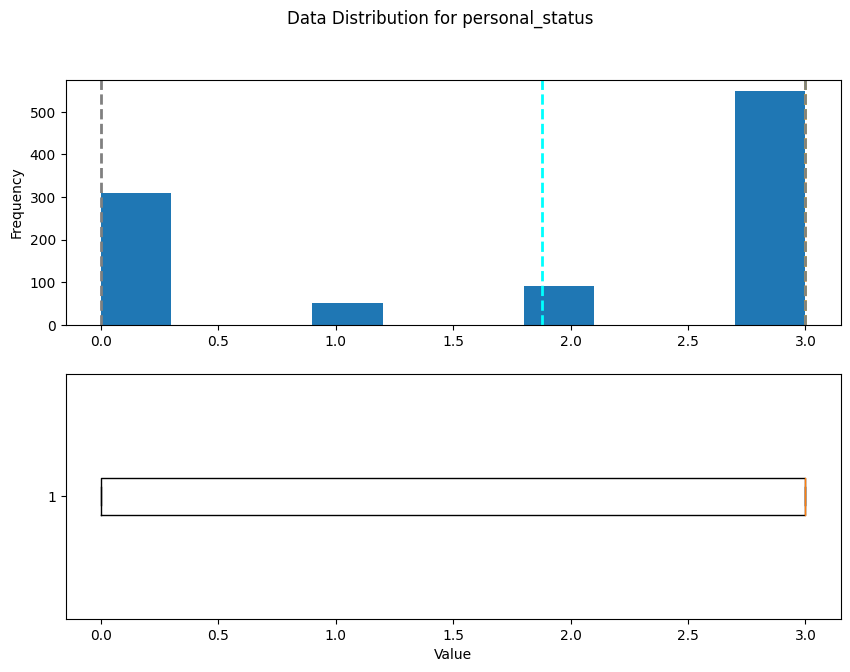

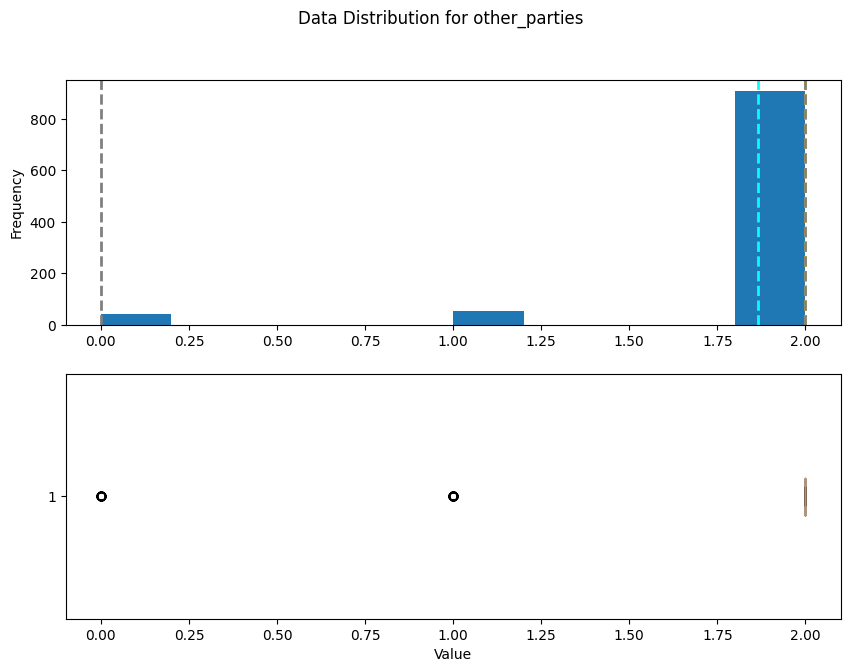

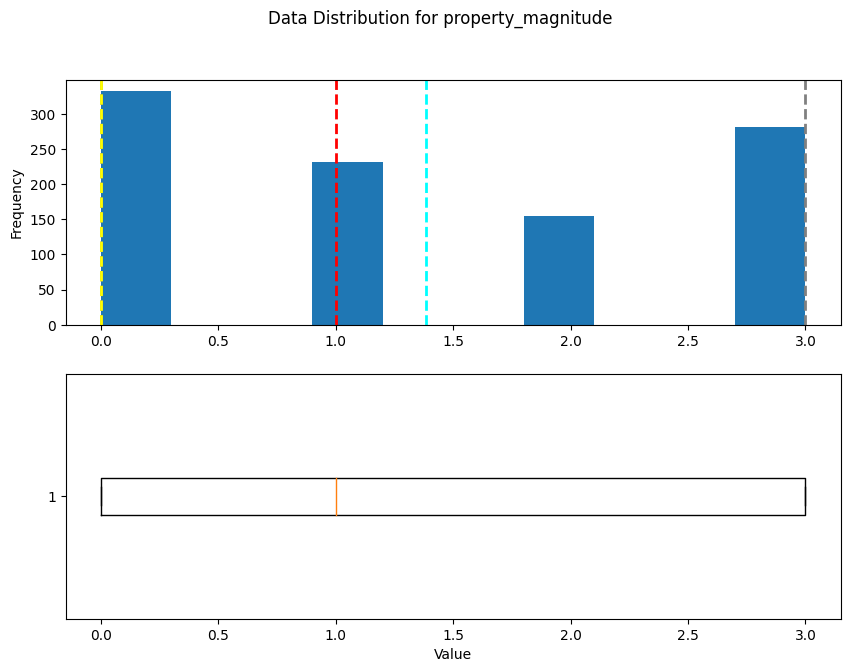

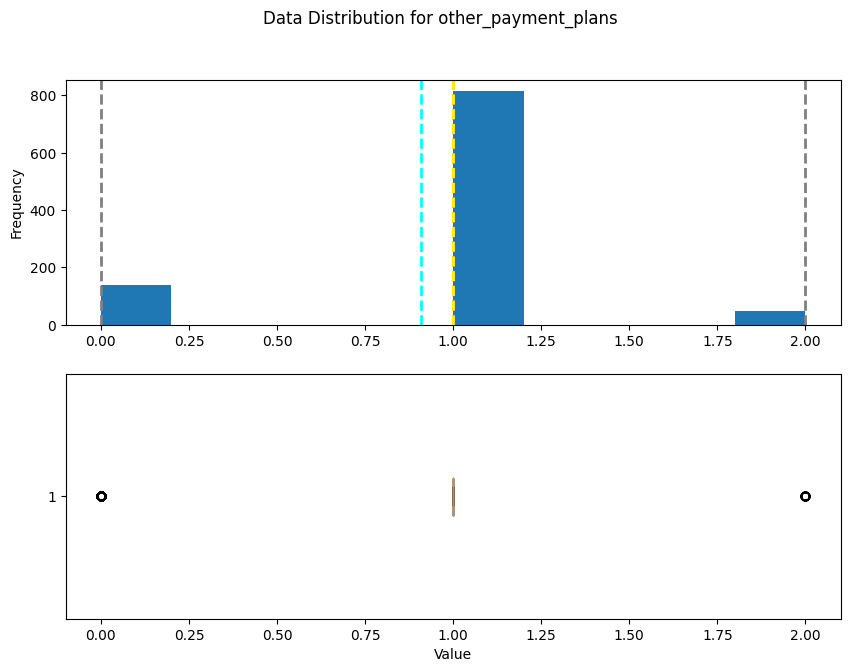

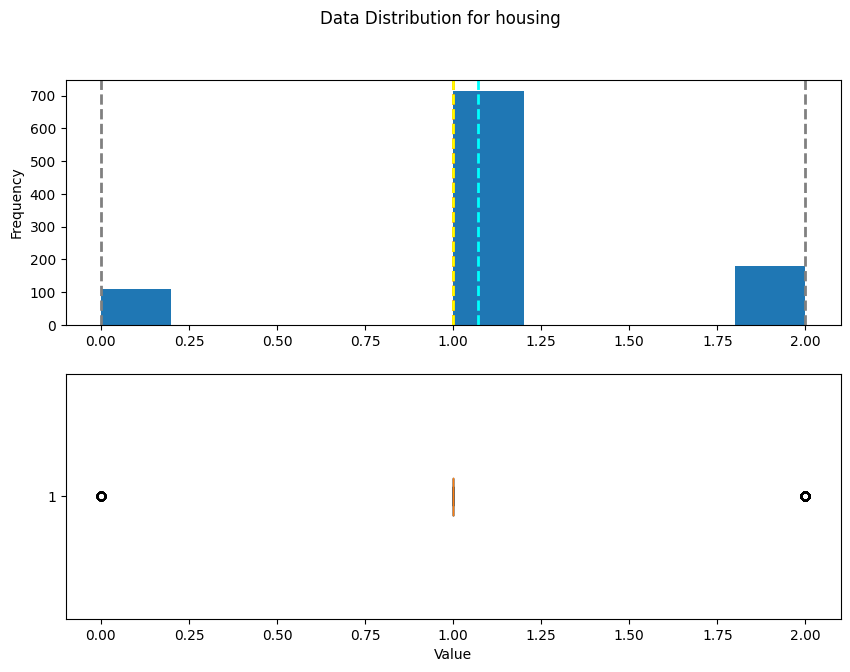

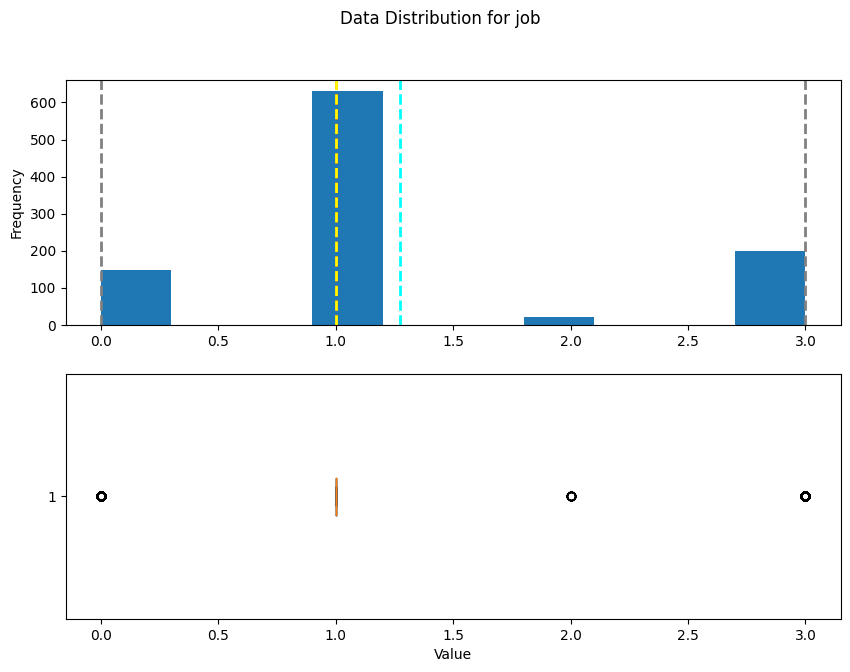

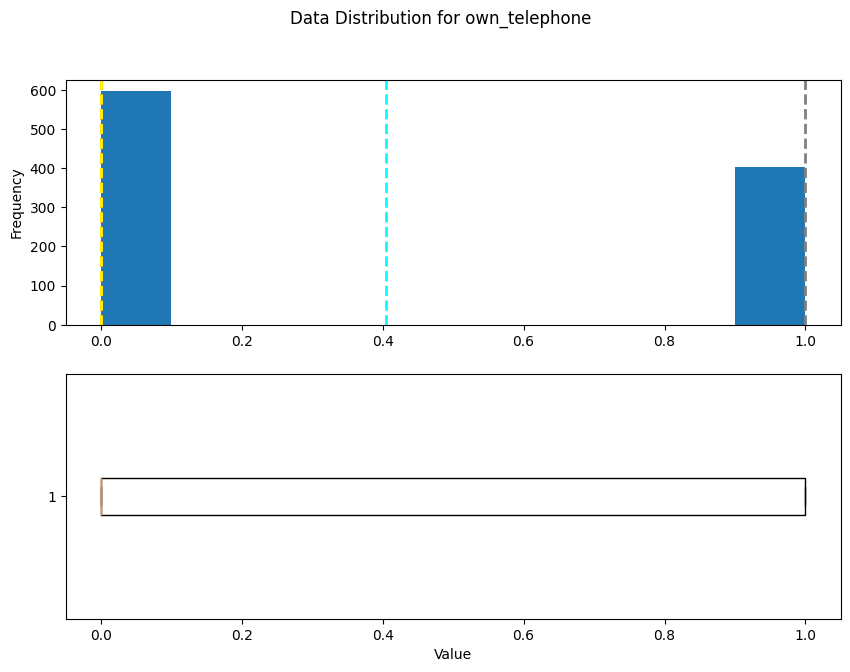

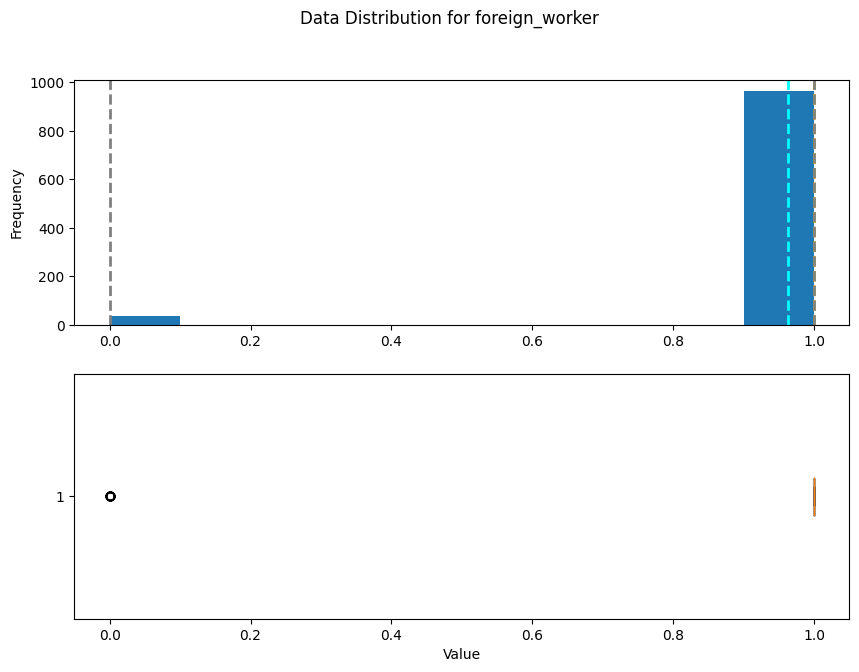

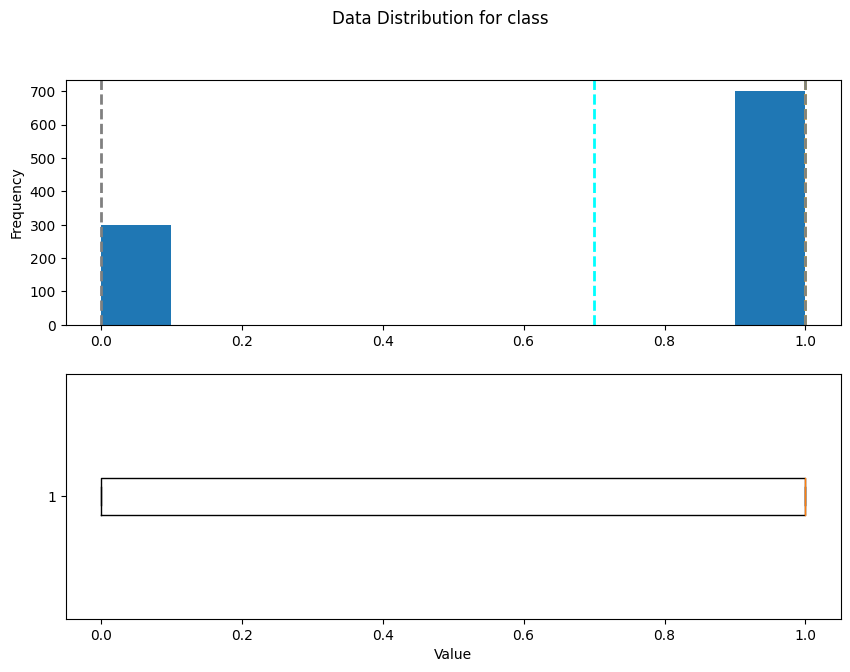

In [169]:

def show_distribution(var_data,col):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution for {col}')

    # Show the figure
    fig.show()

# Get the variable to examine

#columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
for col_namne in columns_list_after_change:
    col = dstree[col_namne]
    # Call the function
    show_distribution(col,col_namne)


#### 2.1.2.1 Get the normalized changed data to have better observation

In [170]:
dstree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int8   
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int32  
 3   purpose                 1000 non-null   int32  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int8   
 6   employment              1000 non-null   int8   
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int32  
 9   other_parties           1000 non-null   int32  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int32  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int32  
 14  housing                 1000 non-null   i

## 3. Clean data

### 3.1 Hanlding Missing Values

#### 3.1.1 Count Missing Value

In [171]:

##Count missing value
number_of_null = dstree.isna().sum()
print(number_of_null)
print()
percentage_of_complete = (1 - number_of_null / len(dstree))* 100
print(percentage_of_complete)
print(dstree.shape)


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

checking_status           100.0
duration                  100.0
credit_history            100.0
purpose                   100.0
credit_amount             100.0
savings_status            100.0
employment                100.0
installment_commitment    100.0
personal_status           100.0
other_parties             100.0
residence_since           100.0
property_magnitude        100.0
age           

#### 3.1.2 Visualize Missing Values

<Axes: >

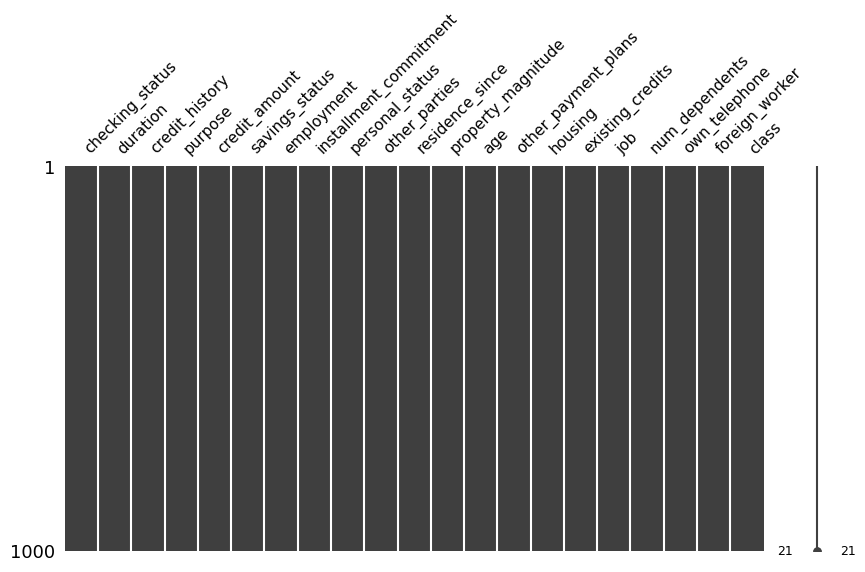

In [172]:

# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dstree, figsize=(10,5), fontsize=11)

#### 3.1.4 Drop the rows that have missing value

In [173]:
#before drop 
print(dstree.shape)
drop_missing_datasource = dstree.dropna()
#after drop
print('After removing all the null values', drop_missing_datasource.shape)
#count number of nulls after drop 
number_of_null_after_drop_null = drop_missing_datasource.isna().sum()
print(number_of_null_after_drop_null)
print()
percentage_of_completeness_after_drop_null = (1 - number_of_null_after_drop_null / len(drop_missing_datasource))* 100
print(percentage_of_completeness_after_drop_null)
print(drop_missing_datasource.shape)


(1000, 21)
After removing all the null values (1000, 21)
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

checking_status           100.0
duration                  100.0
credit_history            100.0
purpose                   100.0
credit_amount             100.0
savings_status            100.0
employment                100.0
installment_commitment    100.0
personal_status           100.0
other_parties             100.0
residence_since      

#### 3.1.5 Impute the row with median that have missing value
#### there is no missing value so this step is not in use

In [174]:
# #before impute
# print(ds.shape)
# df_filled = dstree.copy()
# median_work_experience = df_filled['Work_Experience'].median()
# df_filled['Work_Experience'].fillna(median_work_experience, inplace = True)
# #impute_missing = datasource['Work_Experience'].fillna(datasource['Work_Experience'].median())
# number_of_null_after_impute_median = df_filled.isna().sum()
# print(number_of_null_after_impute_median)
# print()
# percentage_of_completeness_after_impute_null = (1 - number_of_null_after_impute_median / len(df_filled))* 100
# print(percentage_of_completeness_after_impute_null)
# print(df_filled.shape)


### 3.2 Handling outliers

#### 3.2.1 Remove outlier

In [175]:
#remove the rows that have null values

dstree_remove_outlier = copy.deepcopy(dstree)
columns_to_drop = ['class']
remove_outlier = dstree_remove_outlier.drop(columns_to_drop, axis=1)
df_with_outlier = pd.DataFrame(remove_outlier)

Q1 = df_with_outlier.quantile(0.25)
Q3 = df_with_outlier.quantile(0.75)
IQR = Q3 - Q1

iqr_factor = 1.5

df_no_outliers = df_with_outlier[~((df_with_outlier < (Q1 - iqr_factor * IQR)) | (df_with_outlier > (Q3 + iqr_factor * IQR))).any(axis=1)]


# current_plaette = sns.color_palette("hls", 12)#color
# #column_to_drop = 'ID'
# #df_withoutid = df.drop(column_to_drop, axis = 1)
# plt.figure(figsize=(15, 3))


# sns.boxplot(data = df_no_outliers, palette = current_plaette)#plot boxplot

# plt.show()

In [176]:
print("Before Drop Outlier: ")
print(dstree.shape)
print()
print("After Drop Outlier: ")
print(df_no_outliers.shape)

Before Drop Outlier: 
(1000, 21)

After Drop Outlier: 
(150, 20)


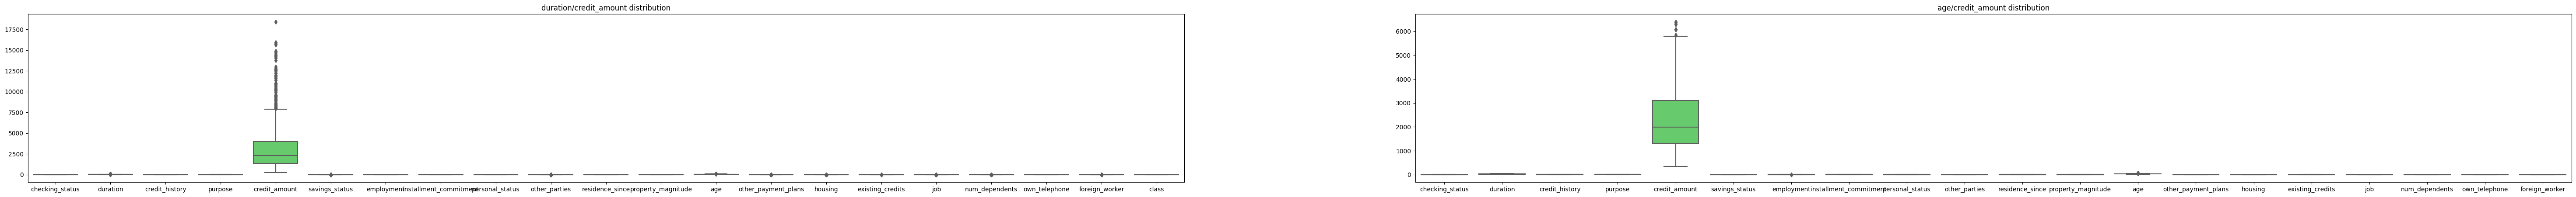

In [177]:
fig, ax = plt.subplots(1, 2, figsize = (75, 5))
current_plaette = sns.color_palette("hls", 12)#color
#sns.histplot(datasource, x='num_dependents',hue="class", bins=30, ax=ax[0]).set_title("Age/Family Size distribution");
sns.boxplot(data = dstree, palette = current_plaette, ax=ax[0]).set_title("duration/credit_amount distribution")
sns.boxplot(data = df_no_outliers, palette = current_plaette, ax=ax[1]).set_title("age/credit_amount distribution")

# before removing outlier

plt.show()


In [178]:
column_names = dstree.columns.tolist()
print(column_names)

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']


#### 3.2.2 noramlization

In [179]:
column_to_drop = 'class'
nor_dstree = copy.deepcopy(dstree)
df_withoutid = nor_dstree.drop(column_to_drop, axis = 1)

from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
datasource_normalized = df_withoutid.copy()

# Normalize the numeric columns
#datasource_normalized[['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']] = scaler.fit_transform(datasource_normalized[['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']])
datasource_normalized[[ 'duration','credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']] = scaler.fit_transform(datasource_normalized[['duration','credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']])


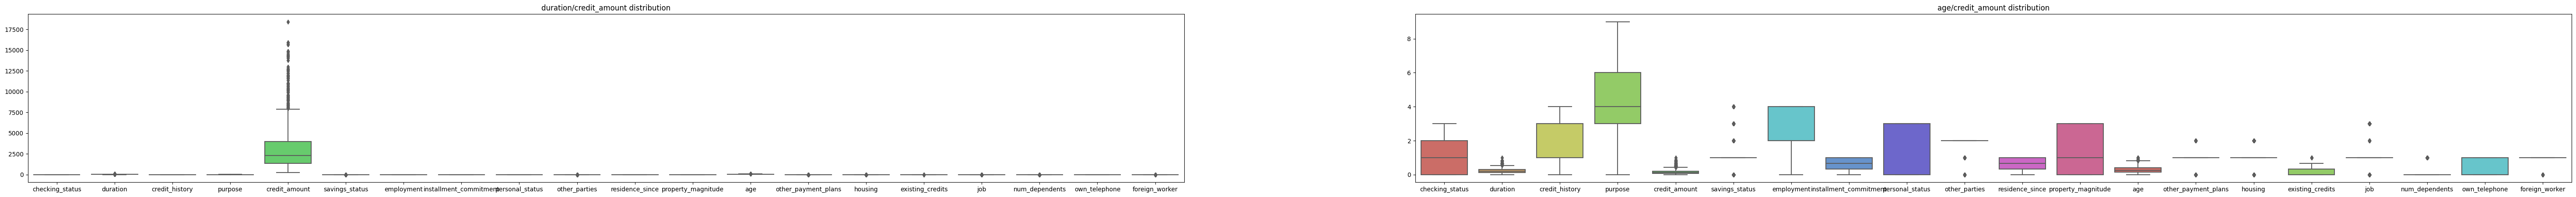

In [180]:
fig, ax = plt.subplots(1, 2, figsize = (75, 5))
current_plaette = sns.color_palette("hls", 12)#color
#sns.histplot(datasource, x='num_dependents',hue="class", bins=30, ax=ax[0]).set_title("Age/Family Size distribution");
sns.boxplot(data = df_withoutid, palette = current_plaette, ax=ax[0]).set_title("duration/credit_amount distribution")
sns.boxplot(data = datasource_normalized, palette = current_plaette, ax=ax[1]).set_title("age/credit_amount distribution")

# before removing outlier

plt.show()

#### 3.2.2.1 Visualize before normalization 

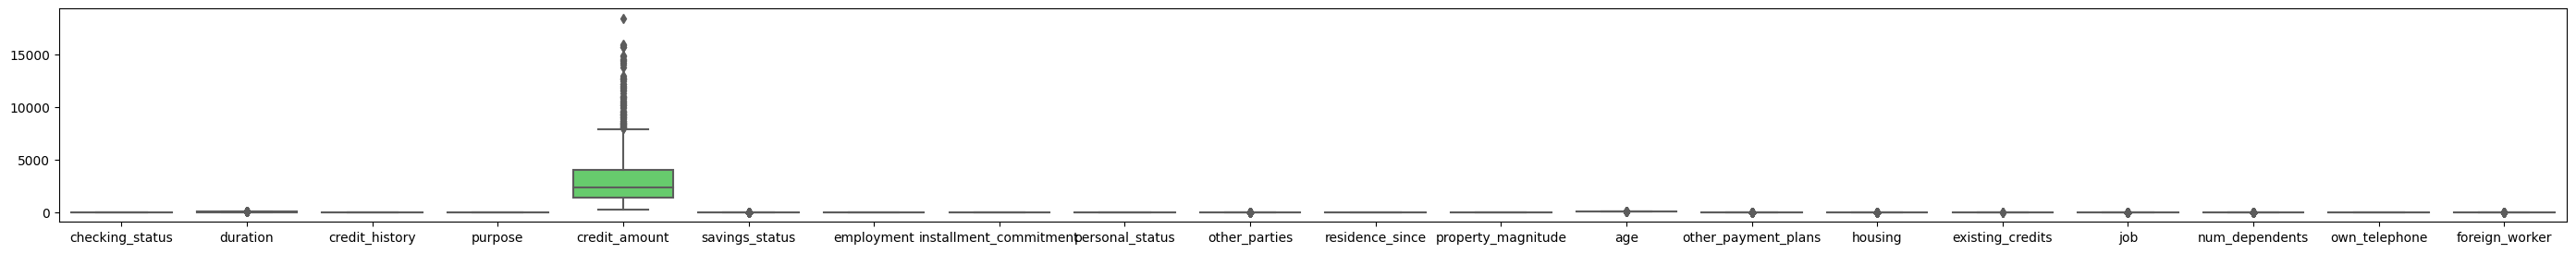

In [181]:
current_plaette = sns.color_palette("hls", 12)#color
column_to_drop = 'class'
df_withoutid = dstree.drop(column_to_drop, axis = 1)
plt.figure(figsize=(35, 3))

#no_id = datasource_normalized.drop('ID', axis = 1)
sns.boxplot(data = df_withoutid, palette = current_plaette)#plot boxplot

plt.show()

#### 3.2.2.2 Visualize after normalization 

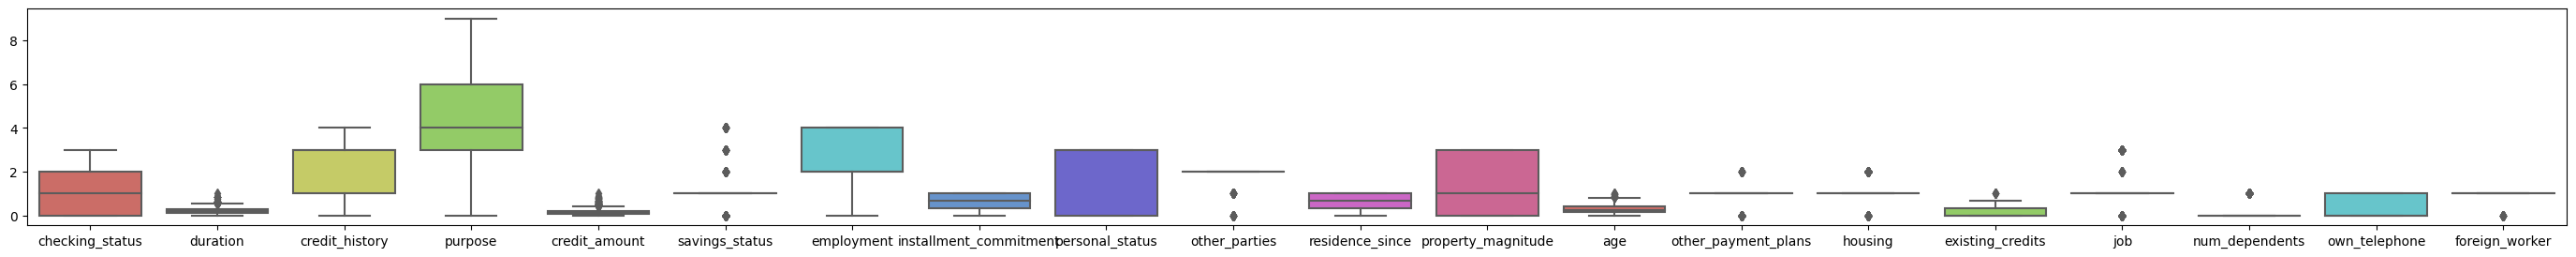

In [182]:
current_plaette = sns.color_palette("hls", 12)#color
#column_to_drop = 'ID'
#df_withoutid = df.drop(column_to_drop, axis = 1)
plt.figure(figsize=(35, 3))
sns.boxplot(data = datasource_normalized, palette = current_plaette)#plot boxplot

plt.show()

In [183]:
print('Original data:', dstree.shape)
print()
print('Normalized data:', datasource_normalized.shape)

Original data: (1000, 21)

Normalized data: (1000, 20)


### 3.3 Handle imbalanced data

#### 3.3.1 boosting imbalanced data 

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

In [184]:
#imbalance data example
dstree_imbalance = copy.deepcopy(dstree)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
LE = LabelEncoder()
c = dstree_imbalance.dropna()
target = LE.fit_transform(c['class'])
columns_to_drop = ['class']
df_dropped = c.drop(columns_to_drop, axis=1)

smote = SMOTE()
x_s,target_s = smote.fit_resample(df_dropped, target)

print("Before Balance", Counter(target)) 
print('After Balance', Counter(target_s))


Before Balance Counter({1: 700, 0: 300})
After Balance Counter({1: 700, 0: 700})


In [185]:
x_s_df = pd.DataFrame(x_s, columns=df_dropped.columns)
target_s_df = pd.DataFrame(target_s, columns=['target'])

combined_df = pd.concat([x_s_df, target_s_df], axis=1)

In [186]:
combined_df

checking_status   duration  credit_history  purpose  credit_amount  \
0                   1   6.000000               1        6    1169.000000   
1                   2  48.000000               3        6    5951.000000   
2                   0  12.000000               1        2    2096.000000   
3                   1  42.000000               3        3    7882.000000   
4                   1  24.000000               2        4    4870.000000   
...               ...        ...             ...      ...            ...   
1395                2  24.000000               2        7   11692.756821   
1396                1  48.000000               1        7    6306.630091   
1397                1  38.532791               2        2    4419.118799   
1398                1  14.027911               1        3    3403.066290   
1399                1  35.672406               2        2    9023.462398   

      savings_status  employment  installment_commitment  personal_status  \
0                  0           4                4.000000                3   
1                  1           2                2.000000                0   
2                  1           3                2.000000                3   
3                  1           3                2.000000                3   
4                  1           2                3.000000                3   
...              ...         ...                     ...              ...   
1395               1           2                1.351209                1   
1396               1           4                4.000000                3   
1397               1           2                2.422132                1   
1398               1           2                1.334496                0   
1399               1           1                3.945401                3   

      other_parties  ...  property_magnitude        age  other_payment_plans  \
0                 2  ...                   3  67.000000                    1   
1                 2  ...                   3  22.000000                    1   
2                 2  ...                   3  49.000000                    1   
3                 1  ...                   1  45.000000                    1   
4                 2  ...                   2  53.000000                    1   
...             ...  ...                 ...        ...                  ...   
1395              1  ...                   0  28.619336                    1   
1396              2  ...                   2  46.911025                    1   
1397              2  ...                   2  28.311473                    1   
1398              1  ...                   1  36.306585                    1   
1399              0  ...                   1  28.945401                    0   

      housing  existing_credits  job  num_dependents  own_telephone  \
0           1          2.000000    1        1.000000              1   
1           1          1.000000    1        1.000000              0   
2           1          1.000000    3        2.000000              0   
3           0          1.000000    1        2.000000              0   
4           0          2.000000    1        2.000000              0   
...       ...               ...  ...             ...            ...   
1395        1          2.000000    0        1.351209              0   
1396        0          1.772244    1        1.000000              0   
1397        1          2.000000    0        1.422132              1   
1398        2          1.000000    0        1.000000              0   
1399        1          1.027299    0        1.000000              1   

      foreign_worker  target  
0                  1       1  
1                  1       0  
2                  1       1  
3                  1       1  
4                  1       0  
...              ...     ...  
1395               1       0  
1396               1       0  
1397               1       0  
1398               1       0  
1399         

### 3.4 Feature Selection and Conduct data for future use

In [187]:
#feature selection
original_use = datasource.dropna() #drop null values
dstree_set = dstree.dropna()
# svm_set = ds.dropna()

#### 3.4.1 Linear Model(no longer use)

In [188]:
# from sklearn.linear_model import LassoCV
# columns_to_drop = ['Segmentation'] 

# selection_data = copy.deepcopy(combination_original)

# x = selection_data.drop(columns_to_drop, axis=1)
# y = selection_data["Segmentation"]

# lasso = LassoCV().fit(x,y)
# features = x.columns
# coefficients = np.abs(lasso.coef_)
# coef_df = pd.DataFrame({"Feature":features,"Cofficient":coefficients})

In [189]:
# coef_df_sorted = coef_df.sort_values('Cofficient',ascending=False)

In [190]:
# coef_df_sorted

#### 3.4.2 Using Random Forrest doing Feature Selection

In [191]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
selection_original_use = copy.deepcopy(original_use)
selection_dstree_set = copy.deepcopy(dstree_set)
# selection_svm_set = copy.deepcopy(svm_set)


In [194]:
selection_dstree_set.shape

(1000, 21)

In [195]:
data_types = selection_original_use.dtypes
print(data_types)

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object


#### 3.4.2.1 dstree original with feature selection


In [196]:
clf = RandomForestClassifier()
columns_to_drop = ['class'] 
X_d = selection_dstree_set.drop(columns_to_drop, axis=1)
y_d = selection_dstree_set["class"]

clf.fit(X_d,y_d)
importances_d = clf.feature_importances_


In [197]:
feature_df_d = pd.DataFrame({"Feature":X_d.columns,"Score":clf.feature_importances_}) #change to dataFrame

In [198]:
feature_df_sorted_d = feature_df_d.sort_values('Score',ascending=False) #Sort the features based on the importance of Score

In [199]:
# Cutomized a threshold and we keep the features that is higher than the given threshold
import_feature_d = []
for index,element in feature_df_sorted_d.iterrows():
    
    if element.Score < 0.02:
        break
    import_feature_d.append(element.Feature)

In [200]:
# Filter out non-important features 
print(import_feature_d)
print(len(import_feature_d))
import_feature_d = import_feature_d + ["class"]
after_feature_selection_d = selection_dstree_set[import_feature_d]

['credit_amount', 'checking_status', 'duration', 'age', 'purpose', 'credit_history', 'employment', 'savings_status', 'property_magnitude', 'residence_since', 'installment_commitment', 'job', 'personal_status', 'other_payment_plans', 'housing', 'existing_credits']
16


In [201]:
#result after feature selection
print(after_feature_selection_d.columns)
print(len(after_feature_selection_d.columns))

Index(['credit_amount', 'checking_status', 'duration', 'age', 'purpose',
       'credit_history', 'employment', 'savings_status', 'property_magnitude',
       'residence_since', 'installment_commitment', 'job', 'personal_status',
       'other_payment_plans', 'housing', 'existing_credits', 'class'],
      dtype='object')
17


In [202]:
len(feature_df_sorted_d)

20

In [203]:
# overview of feature importance 
for feature,importance in zip(X_d.columns, clf.feature_importances_):
    print(f"Feature {feature}: {importance}")

Feature checking_status: 0.1119598455443249
Feature duration: 0.10418213644608222
Feature credit_history: 0.054905618248526335
Feature purpose: 0.0662493159794148
Feature credit_amount: 0.13541827792577102
Feature savings_status: 0.048204158016403584
Feature employment: 0.05377219755667242
Feature installment_commitment: 0.04050461821187437
Feature personal_status: 0.03250628383776775
Feature other_parties: 0.016460111167560066
Feature residence_since: 0.04106700695518747
Feature property_magnitude: 0.04492264483252785
Feature age: 0.102470500162246
Feature other_payment_plans: 0.029369273086114176
Feature housing: 0.02535954707022113
Feature existing_credits: 0.02216238079024956
Feature job: 0.03351218843277846
Feature num_dependents: 0.014067619256613378
Feature own_telephone: 0.01878704970853666
Feature foreign_worker: 0.00411922677112793


### 3.5 Finalize dstree feature selection then boost class as class is unbalanced

### normalization 


In [204]:
column_to_drop = 'class'
before_nor_dstree = copy.deepcopy(dstree)
df_before_nor = before_nor_dstree.drop(column_to_drop, axis = 1)

from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
datasource_normalized_ds = df_before_nor.copy()

# Normalize the numeric columns
#datasource_normalized_ds[['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']] = scaler.fit_transform(datasource_normalized_ds[['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']])
datasource_normalized_ds[[ 'duration','credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']] = scaler.fit_transform(datasource_normalized_ds[['duration','credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']])


In [205]:
result = pd.concat([datasource_normalized_ds, dstree["class"]], axis=1)

In [206]:
result.shape

(1000, 21)

### feature selection

In [207]:
clf = RandomForestClassifier()
columns_to_drop = ['class'] 
X_n = result.drop(columns_to_drop, axis=1)
y_n = result["class"]

clf.fit(X_n,y_n)
importances_n = clf.feature_importances_


In [208]:
feature_df_n = pd.DataFrame({"Feature":X_n.columns,"Score":clf.feature_importances_}) #change to dataFrame

In [209]:
feature_df_sorted_n = feature_df_n.sort_values('Score',ascending=False) #Sort the features based on the importance of Score

In [210]:
# Cutomized a threshold and we keep the features that is higher than the given threshold
import_feature_n = []
for index,element in feature_df_sorted_n.iterrows():
    
    if element.Score < 0.02:
        break
    import_feature_n.append(element.Feature)

In [211]:
# Filter out non-important features 
print(import_feature_n)
print(len(import_feature_n))
import_feature_n = import_feature_n + ["class"]
after_feature_selection_n = result[import_feature_n]

['credit_amount', 'checking_status', 'age', 'duration', 'purpose', 'credit_history', 'employment', 'savings_status', 'property_magnitude', 'residence_since', 'installment_commitment', 'job', 'personal_status', 'other_payment_plans', 'housing', 'existing_credits']
16


In [212]:
#result after feature selection
print(after_feature_selection_n.columns)
print(len(after_feature_selection_n.columns))

Index(['credit_amount', 'checking_status', 'age', 'duration', 'purpose',
       'credit_history', 'employment', 'savings_status', 'property_magnitude',
       'residence_since', 'installment_commitment', 'job', 'personal_status',
       'other_payment_plans', 'housing', 'existing_credits', 'class'],
      dtype='object')
17


In [213]:
len(feature_df_sorted_n)

20

In [214]:
# overview of feature importance 
for feature,importance in zip(X_n.columns, clf.feature_importances_):
    print(f"Feature {feature}: {importance}")

Feature checking_status: 0.11087512592247238
Feature duration: 0.10360529077863889
Feature credit_history: 0.05907849113954781
Feature purpose: 0.067125702757011
Feature credit_amount: 0.13630827391878086
Feature savings_status: 0.04623858732734118
Feature employment: 0.0492535597586573
Feature installment_commitment: 0.040867728854914034
Feature personal_status: 0.032276900979122246
Feature other_parties: 0.01847231822235477
Feature residence_since: 0.04135132632447182
Feature property_magnitude: 0.04188060763451773
Feature age: 0.10482884529052432
Feature other_payment_plans: 0.029718498610890935
Feature housing: 0.027688579075872223
Feature existing_credits: 0.022220437009610707
Feature job: 0.033855342862337295
Feature num_dependents: 0.012765937384984894
Feature own_telephone: 0.018047321659651585
Feature foreign_worker: 0.0035411244882980323


### Resampling class

In [215]:
dstree_fs_d = copy.deepcopy(after_feature_selection_d)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
LE = LabelEncoder()
c_d = dstree_fs_d.dropna()
target_d = LE.fit_transform(c_d['class'])
columns_to_drop = ['class']
df_dropped_d = c_d.drop(columns_to_drop, axis=1)

smote = SMOTE()
x_s_d,target_s_d = smote.fit_resample(df_dropped_d, target_d)

print("Before Balance", Counter(target_d)) 
print('After Balance', Counter(target_s_d))


# dstree_imbalance = copy.deepcopy(dstree)
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# LE = LabelEncoder()
# c = dstree_imbalance.dropna()
# target = LE.fit_transform(c['class'])
# columns_to_drop = ['class']
# df_dropped = c.drop(columns_to_drop, axis=1)

# smote = SMOTE()
# x_s,target_s = smote.fit_resample(df_dropped, target)

# print("Before Balance", Counter(target)) 
# print('After Balance', Counter(target_s))

Before Balance Counter({1: 700, 0: 300})
After Balance Counter({1: 700, 0: 700})


In [216]:
x_s_d_df = pd.DataFrame(x_s_d, columns=df_dropped_d.columns)
target_s_d_df = pd.DataFrame(target_s_d, columns=['class'])

combined_fs_d = pd.concat([x_s_d_df, target_s_d_df], axis=1) #final data

In [217]:
combined_fs_d.head(5)

credit_amount  checking_status  duration   age  purpose  credit_history  \
0         1169.0                1       6.0  67.0        6               1   
1         5951.0                2      48.0  22.0        6               3   
2         2096.0                0      12.0  49.0        2               1   
3         7882.0                1      42.0  45.0        3               3   
4         4870.0                1      24.0  53.0        4               2   

   employment  savings_status  property_magnitude  residence_since  \
0           4               0                   3              4.0   
1           2               1                   3              2.0   
2           3               1                   3              3.0   
3           3               1                   1              4.0   
4           2               1                   2              4.0   

   installment_commitment  job  personal_status  other_payment_plans  housing  \
0                     4.0    1                3                    1        1   
1                     2.0    1                0                    1        1   
2                     2.0    3                3                    1        1   
3                     2.0    1                3                    1        0   
4                     3.0    1                3                    1        0   

   existing_credits  class  
0               2.0      1  
1               1.0      0  
2               1.0      1  
3               1.0      1  
4               2.0      0

## 4. Identify correlated variables

### 4.1 Show the original converted datatype dataset

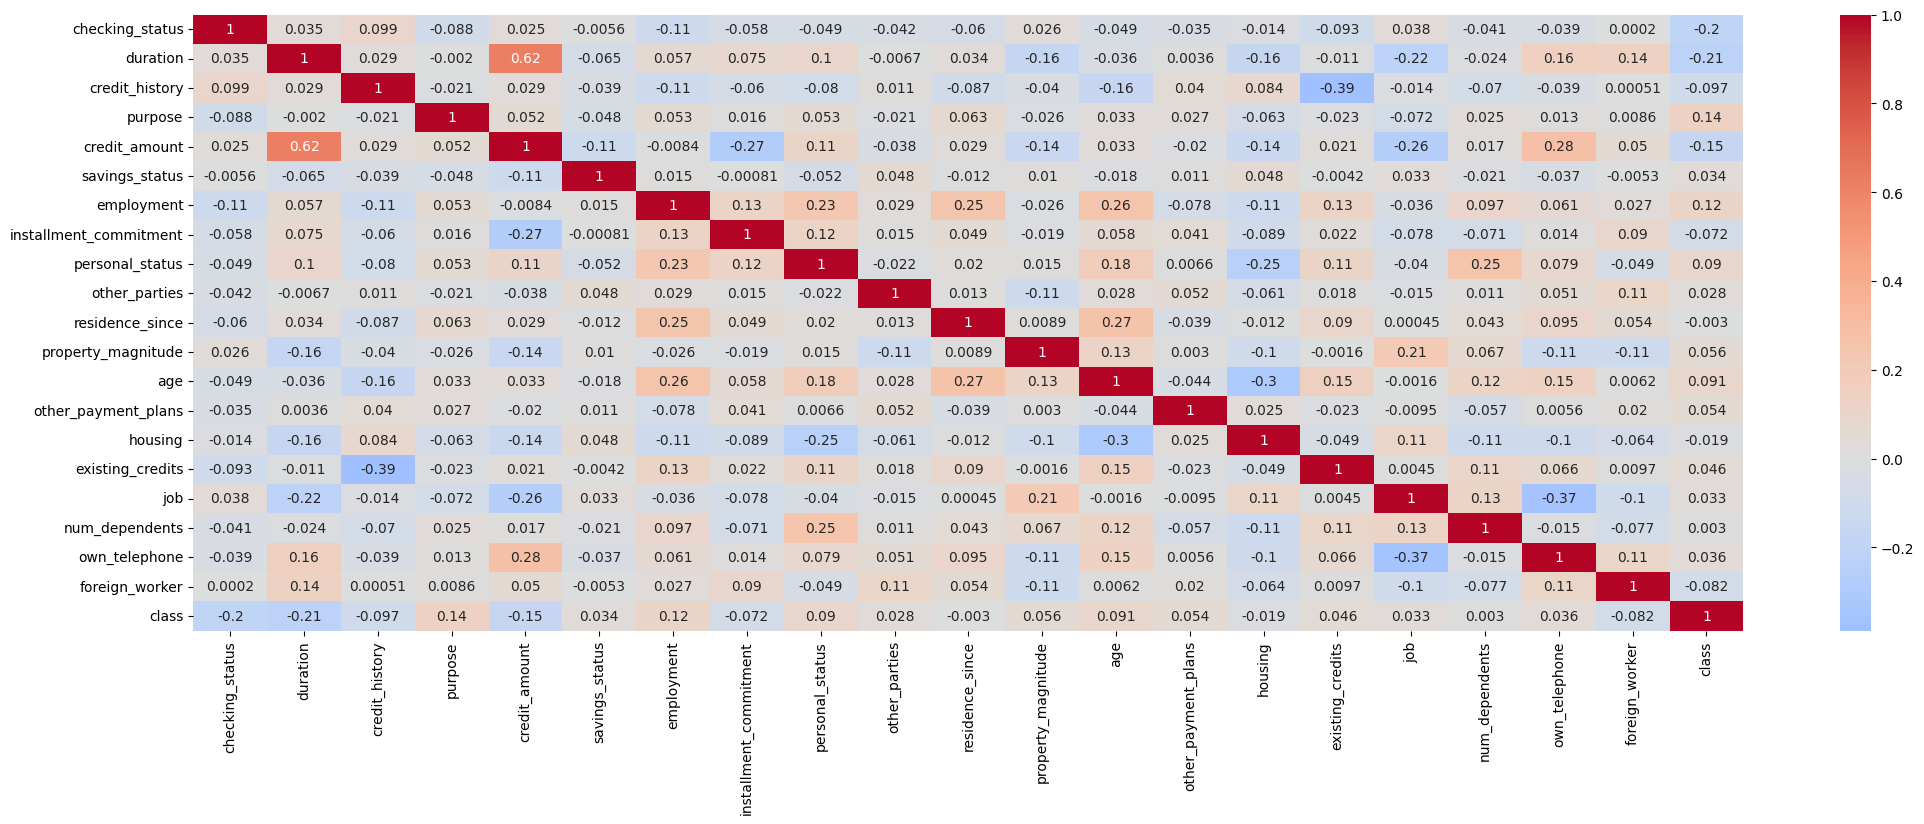

In [218]:
plt.figure(figsize=(25,8))
sns.heatmap(dstree.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()

In [219]:
# #show correlation between the variables
# plt.figure(figsize=(25,8))
# sns.heatmap(svm_set.corr(),annot=True, cmap='coolwarm', center = 0)
# plt.show()

### 4.2 Show the correlation of label encoder converted data then do normailization, feature selection

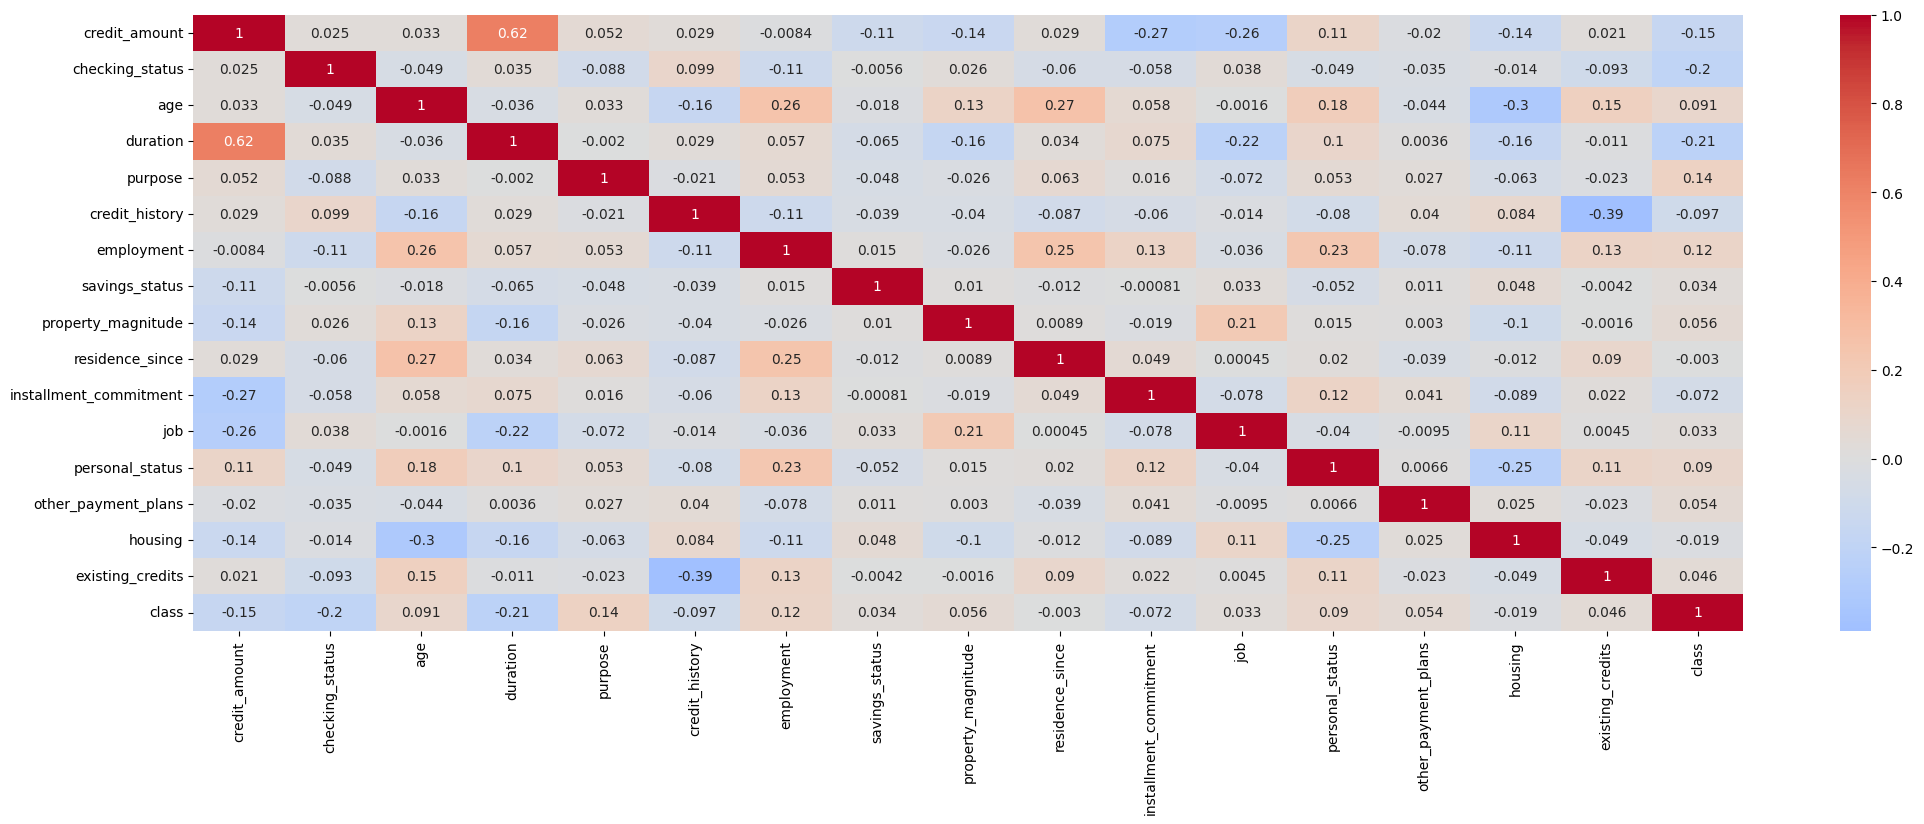

In [220]:
#show correlation between the variables
plt.figure(figsize=(25,8))
sns.heatmap(after_feature_selection_n.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()

### 4.3 Show correlation after feature selection

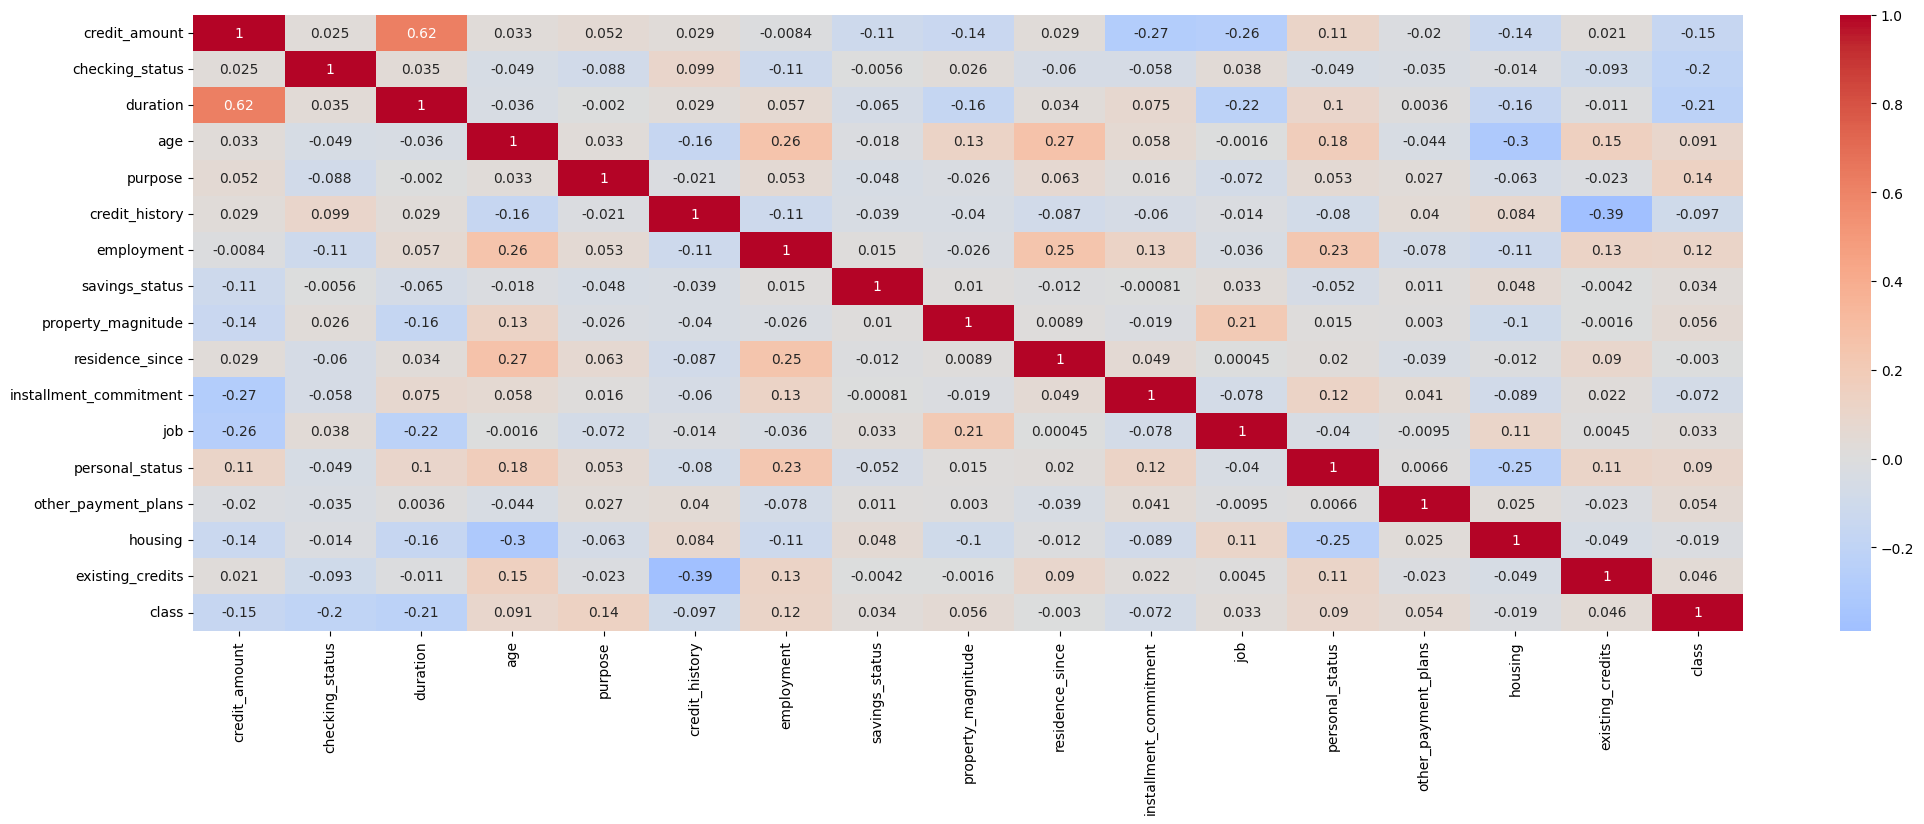

In [221]:
#show correlation between the variables
plt.figure(figsize=(25,8))
sns.heatmap(after_feature_selection_d.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()

### 4.4 Show the correlation after normailization, feature selection and boosting

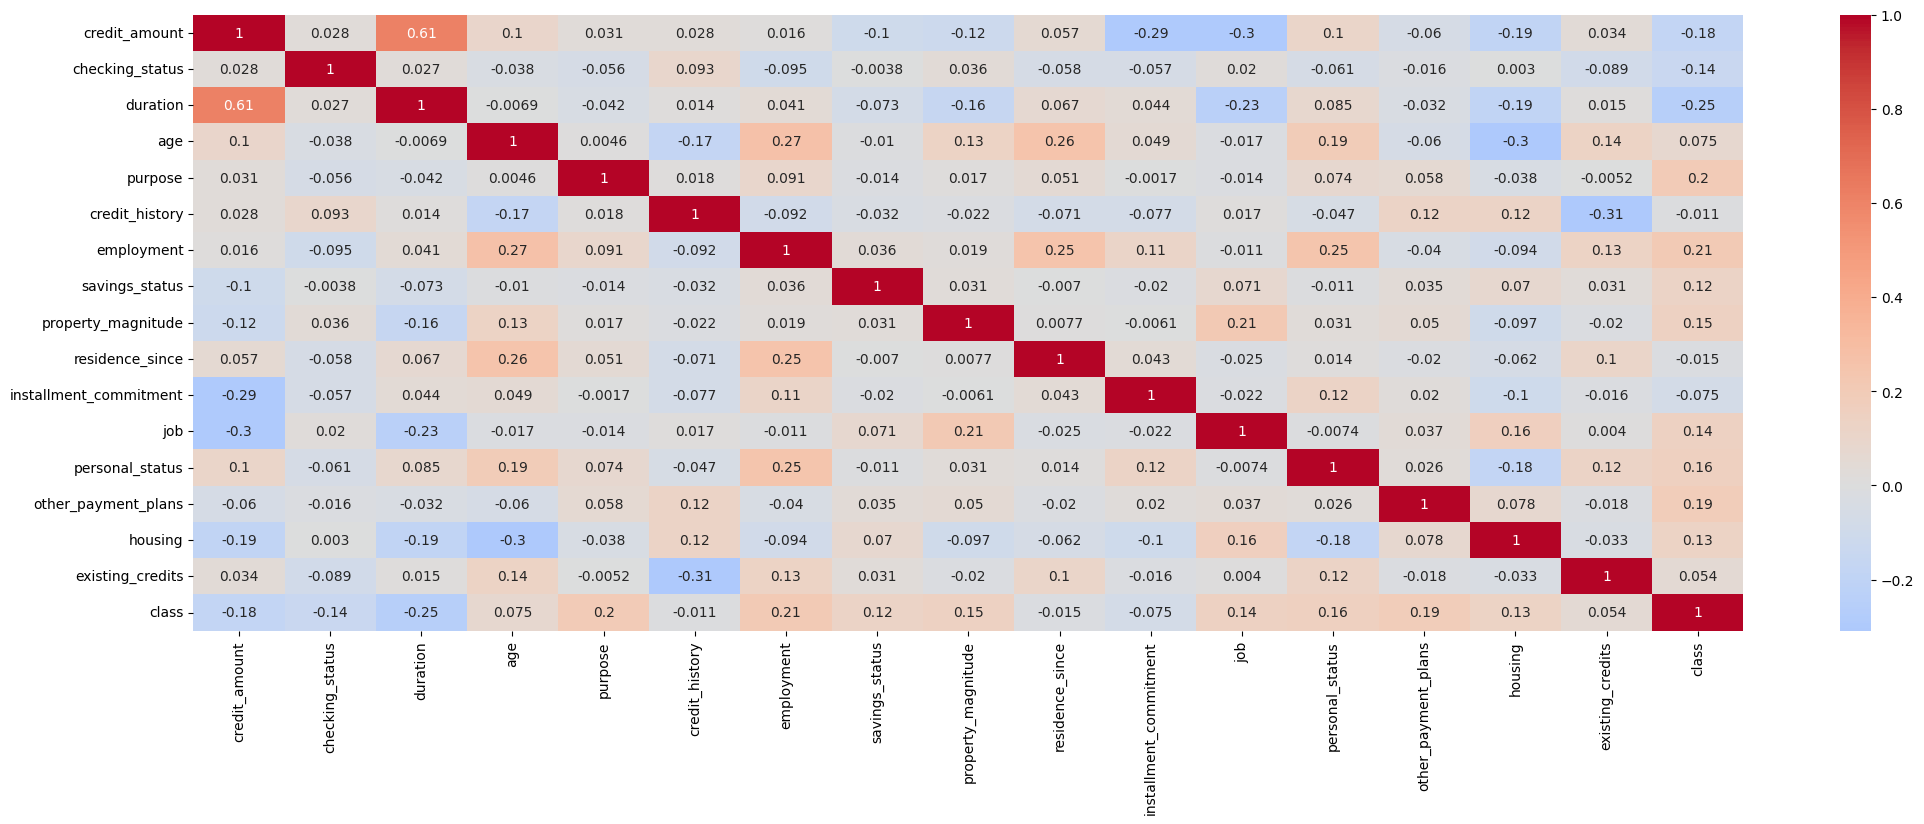

In [222]:
#show correlation between the variables
plt.figure(figsize=(25,8))
sns.heatmap(combined_fs_d.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()


Heatmap demonstrates the correlation between all the attributes. I have done multiple correlation demonstration to have brief and in-depth demonstration.

The darkest color represents the strongest correlation. And the lightest color shows the weakest correlation. 

We could observe:

    - that 'duration','employment', 'purpose', 'personal_status','credit_amount','checking_status','property magnitude', 'saving_status', 'housing' have more impact on our target class. 
    - 'other_payment_plans','credit_history', 'residence_since','installment_commitment', 'job', and 'existing_credits' has less correlation with target class
    For the high related variables:
        - We could see that duration has significant correlation with credit_amount. 
  

In [223]:
after_feature_selection_n.head(3)

credit_amount  checking_status       age  duration  purpose  \
0       0.050567                1  0.857143  0.029412        6   
1       0.313690                2  0.053571  0.647059        6   
2       0.101574                0  0.535714  0.117647        2   

   credit_history  employment  savings_status  property_magnitude  \
0               1           4               0                   3   
1               3           2               1                   3   
2               1           3               1                   3   

   residence_since  installment_commitment  job  personal_status  \
0         1.000000                1.000000    1                3   
1         0.333333                0.333333    1                0   
2         0.666667                0.333333    3                3   

   other_payment_plans  housing  existing_credits  class  
0                    1        1          0.333333      1  
1                    1        1          0.000000      0  
2                    1        1          0.000000      1

## 5. Summary

## 5.1 export data

In [224]:
# csv_filename = './data/credit_classification_normalized89.csv'
# after_feature_selection_n.to_csv(csv_filename, index=False)

# print(f"CSV File '{csv_filename}' ")

In [225]:
# csv_filename = './data/credit_classification_encoded89.csv'
# dstree.to_csv(csv_filename, index=False)

# print(f"CSV File '{csv_filename}' ")

In [226]:
# csv_filename = './data/credit_classification_encoded_featureselction89.csv'
# after_feature_selection_d.to_csv(csv_filename, index=False)

# print(f"CSV File '{csv_filename}' ")

#### final one to use

In [227]:
csv_filename = './data/credit_classification_encode_fs_n_b89.csv'
combined_fs_d.to_csv(csv_filename, index=False)

print(f"CSV File '{csv_filename}' ")

## 5.2
### The dataset I have chosen is credit_risk.csv. The data is provided by MSA and we are using python to do the data analyst process.The first part show the details about the dataset .The target attribute is class(good; bad) referred as good credit and bad credit. By knowing the good/bad, banks or other financial team could access and make decision whether to make loan or any other business with the potential customers.  

### To visualize the numeric variables we could see that credit_amount have more variance range as the standard deviation is large. Which means the loan amount is widely ranged. And duration has some sort of positive correlation with credit_amount. As duration increases, the credit_amount is also increases. 

### I propose to use ordinal encoder and label encoder to do the converting datatype. As some of the attributes have explicit relationships, such as employment, the range is from none to more than 7 and there is an explicit relationship that people who work more than 7 years is longer than people who works for 3 years.

### The reason for choosing label encoder as it does not introduce more attributes (dimensions), although one-hot encoder may work well when represent categorical data without introducing relationships, but curse of dimensionality will limit the time and the result is hard to visualize. If we use algorithms like SVM, we may consider to use one-hot encoder as such algorithm is sensitive to implicit relationship. But for tree algorithms, it will treat the values like label. Hence, I propose to use label encoder and ordinal encoder to convert the data type.
### After converting, we could notice that our target class is not balanced (good:300; bad:700)

### Then we comes to the part of data cleaning. There is no missing values, i have also demonstrated how to deal with missing values but will not use for this dataset. 

### Other than that. there are some outliers as there is no perfect data. But I propose not to remove the outliers at the current stage (but I have shown an example of how to achieve it), as remove outliers may change the variable distribution and also introduce some new outliers. 

### I have done Min_Max normalization as there are various fields of features. And some features are range from 0-1 and some features are range from 0-100000. In this case, wider range attributes may dominate the result. To prevent the domination, normalization could make the features all into the same scale while maintain the distribution. 

### Then I have done feature selection to filter out the potential unimportant features. But the threshold I set is small for this stage. For future, the threshold could alter to meet different criteria and given conditions.

### After that, I have done SMOTE to boost the minor category of the target class. As the target class is unbalanced. For future feed into model, unbalanced data may not build robust model as the model could simply guess ‘bad’ so it could get a relatively good result. Hence, make the target class balanced is done. 

### Then I have propose to use correlation matrix to show whether to remove any high correlated attributes. At this stage, we keep all of them as the correlation is not so strong among the visualized variables.  


